In [35]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Sesion 2: 31 Agosto 2022

La primera sesión fue meramente introductoria al curso, repaso de numpy en general.

In [2]:
# Objeto principal de nx es Graph()
G = nx.Graph()

In [3]:
#Ya de G se pueden acceder a los nodos y enlaces
G.nodes
G.edges

EdgeView([])

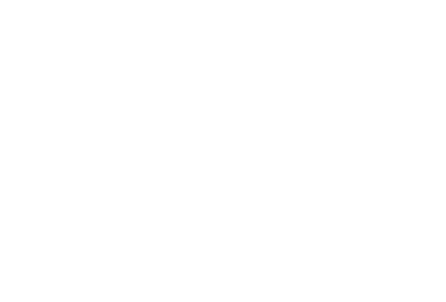

In [4]:
#vamos a usar nx.draw para dibujar grafos
nx.draw(G)

In [5]:
#Agregar nodos:
G.add_node('N1')
G.add_node('N2')
G.add_node('N3')
G.add_node('N4')
G.add_node('N5')

In [6]:
#Agregar enlaces; recibe dos argumentos
G.add_edge('N1','N2')
G.add_edge('N2','N4')
G.add_edge('N5','N1')
G.add_edge('N3','N2')
G.add_edge('N4','N2')
G.add_edge('N1','N5')

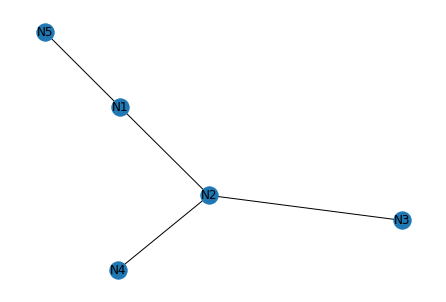

In [7]:
nx.draw(G,with_labels=True)

In [8]:
G.add_nodes_from(['N0','N1','N2','N3','N4'])
G.add_edges_from([('N0','N1'),
                  ('N0','N2'),
                  ('N0','N3'),
                  ('N3','N4'),
                  ('N1','N4'),
                  ('N2','N3')])

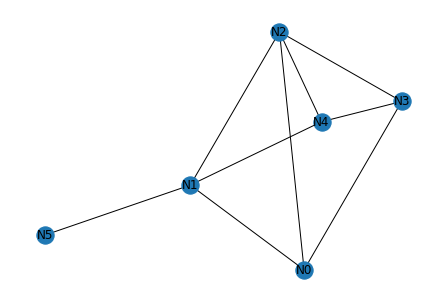

In [9]:
nx.draw(G, with_labels=True)

# Red lineal



In [10]:
N = 50

def Lineal(N):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(zip(nodos[1:],nodos[:-1]))
    
    #for i in range(1,N):
    #    G.add_edge(i,i-1)
        
    nx.draw(G)
    return G

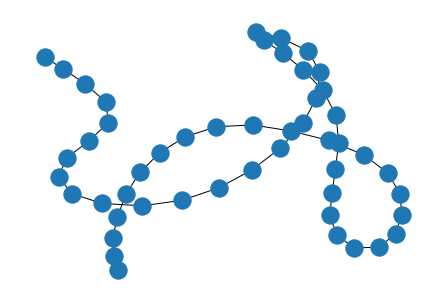

In [11]:
Lineal(50)

In [12]:
N=5
#arange vector 1-dimensional
nodos = np.arange(N)
nodos

array([0, 1, 2, 3, 4])

In [13]:
#zip genrador de iterables?
list(zip(nodos,nodos))

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4)]

In [14]:
list(zip(nodos[1:],nodos[:-1]))

[(1, 0), (2, 1), (3, 2), (4, 3)]

# Estructura Circular

In [15]:
def Circular(N):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(zip(nodos,np.roll(nodos,1)))
    #G.add_edges_from(zip(nodos[1:],nodos[:-1]))
    #G.add_edge(nodos[0],nodos[-1])
        
    nx.draw(G,with_labels=True)
    return G

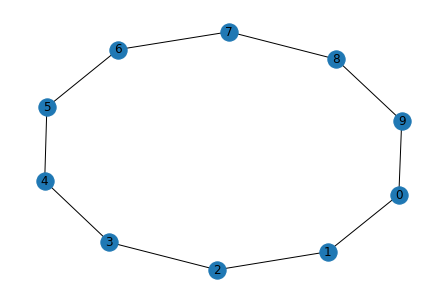

In [16]:
Circular(10)

In [17]:
N=10
nodos = np.arange(N)
#roll recorre los números del arreglo, 0 veces, 1 vez,2 veces etc.
np.roll(nodos,1)

array([9, 0, 1, 2, 3, 4, 5, 6, 7, 8])

In [18]:

list(zip(nodos[:],np.roll(nodos,1)))

[(0, 9),
 (1, 0),
 (2, 1),
 (3, 2),
 (4, 3),
 (5, 4),
 (6, 5),
 (7, 6),
 (8, 7),
 (9, 8)]

# Red Anillo

In [19]:
def Anillo(N,j):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from(range(N))
    #G.add_edges_from(zip(nodos,np.roll(nodos,1)))
    #G.add_edges_from(zip(nodos,np.roll(nodos,2)))
    #G.add_edges_from(zip(nodos,np.roll(nodos,3)))
    
    #for i in range(j):
     #   G.add_edges_from(zip(nodos,np.roll(nodos,i+1)))
    
    [G.add_edges_from(zip(nodos,np.roll(nodos,i+1))) for i in range(j)] #lista por comprehensión.
    
    
    
    nx.draw_circular(G,with_labels=True)
    return G

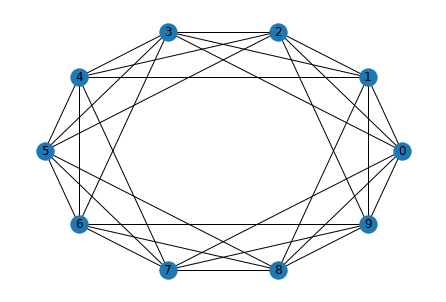

In [20]:
Anillo(10,3)

In [21]:
[i for i in range(5)] #Lista por comprehensión.

[0, 1, 2, 3, 4]

DegreeView({0: 9, 1: 9, 2: 9, 3: 9, 4: 9, 5: 9, 6: 9, 7: 9, 8: 9, 9: 9})

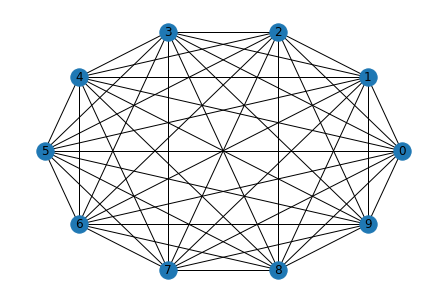

In [22]:
Anillo(10,9).degree #veamos el grado de cada nodo de la red

## Layouts de nx.draw()

https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html

# 07 de Septiembre, 2022 (Sesion 3)

Usaremos listas de adyacencia para representar redes. Ya que es mejor que la matriz porque contiene información más concisa

In [23]:
! ls

 bio-celegans-dir   econ-wm2		'Reporte 1.pdf'
 bio-diseasome	    estrellaDoble.png	'Reporte 1.synctex.gz'
 BT-EIBio.pdf	    estrella.png	'Reporte 1.tex'
 BT-EIBio.png	    ia-infect-dublin	 reptilia-tortoise-network-fi-2011
 BT-EIEcon.pdf	    karate.pdf		 rueda.png
 BT-EIEcon.png	    lattice.png		 socfb-A-anon
 BT-EI.pdf	    main.jl		'Taller1. Networkx con Sergio.ipynb'
 BT-EI.png	    main.py		'Tareas con Graphs.ipynb'
 BT.pdf		    prueba.png		'Tareas con Networkx.ipynb'
 ca-netscience	    reddecontagios.png	'Tutorial de Graphs.ipynb'
 ciencias.png	   'Reporte 1.aux'	 unam1.png
 Clases.ipynb	   'Reporte 1.log'
 econ-poli-large   'Reporte 1.out'


In [24]:
ruta = 'ca-netscience/ca-netscience.mtx'

f = open(ruta, 'r') #r - read

# readlines genera la  lista una vez y luego lo borra para no ocupar espacio.
lineas = f.readlines()
f.close()

In [25]:
len(lineas)

916

In [26]:
G = nx.Graph()

for linea in lineas:
    if linea[0] == "%": continue
    n1, n2 = (linea[:-1].split(' ')) # el -1 para poder quitar el salto de línea.
    G.add_edge(n1,n2)

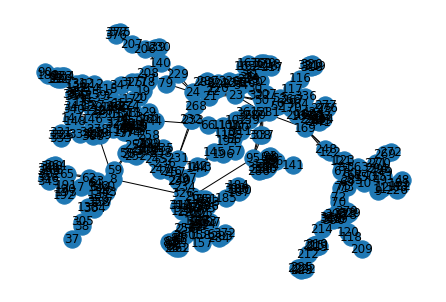

In [27]:
nx.draw(G,with_labels=True)

In [28]:
G.degree('137')#número de grados para el nodo 137

4

In [29]:
A = nx.to_numpy_array(G) #Come la red y la transforma en la matriz de adyacencia

In [30]:
len(A)

379

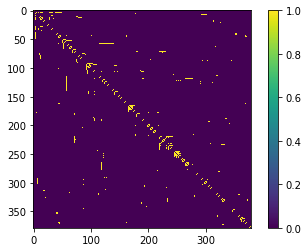

In [31]:
plt.imshow(A,interpolation="none") #interpolation vuelve binarios los colores.
plt.colorbar()

In [32]:
A.dot(A) #El número de caminos de longitud dos A²

array([[ 2.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1., 10.,  1., ...,  0.,  0.,  0.],
       [ 1.,  1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  4.,  3.,  3.],
       [ 0.,  0.,  0., ...,  3.,  4.,  3.],
       [ 0.,  0.,  0., ...,  3.,  3.,  4.]])

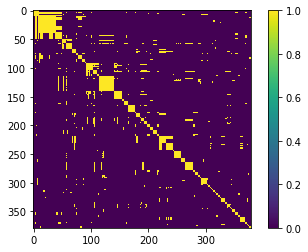

In [33]:
#caminos de longitud dos
plt.imshow(A.dot(A),interpolation="none", vmax=1) 
plt.colorbar()

In [34]:
def Potencia(A,n):
    P = np.identity(len(A))
    for i in range(n):
        P = P.dot(A)
    return (P)

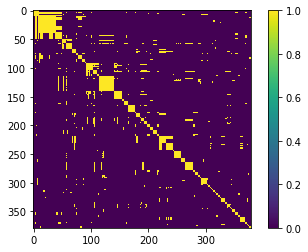

In [35]:
plt.imshow(Potencia(A,2),interpolation="none",vmax=1)#,cmap="autumn")
plt.colorbar()

## Redes dirigidas en la lista de adyacencia/matriz de adyacencia

In [36]:
#Red dirigida
nx.DiGraph()

In [37]:
G = nx.DiGraph()

for linea in lineas[:15]:
    if linea[0] == "%": continue
    n1, n2 = (linea[:-1].split(' ')) # el -1 para poder quitar el salto de línea.
    G.add_edge(n1,n2)

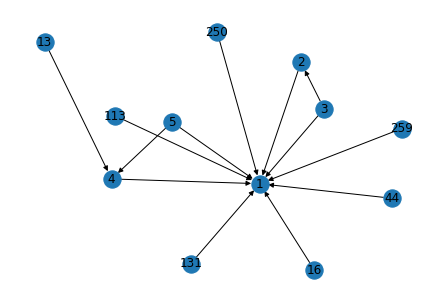

In [38]:
nx.draw(G,with_labels=True)

# Centralidad

In [39]:
G = nx.Graph()

for linea in lineas[:]:
    if linea[0] == "%": continue
    n1, n2 = (linea[:-1].split(' ')) # el -1 para poder quitar el salto de línea.
    G.add_edge(n1,n2,w = np.random.rand())

In [40]:
G.edges(data=True)#para ver toda la información.

EdgeDataView([('2', '1', {'w': 0.9996046919067321}), ('2', '3', {'w': 0.03702883707710036}), ('1', '3', {'w': 0.03367724967895325}), ('1', '4', {'w': 0.09457220860471782}), ('1', '5', {'w': 0.2352760884023677}), ('1', '16', {'w': 0.9556036612186735}), ('1', '44', {'w': 0.46182229766604577}), ('1', '113', {'w': 0.3923314772221733}), ('1', '131', {'w': 0.19362834635211112}), ('1', '250', {'w': 0.09428239733416777}), ('1', '259', {'w': 0.20184922148457496}), ('4', '5', {'w': 0.36383992714948676}), ('4', '13', {'w': 0.6350236696436675}), ('4', '14', {'w': 0.3070646915130778}), ('4', '15', {'w': 0.39956644501452476}), ('4', '16', {'w': 0.717620837485739}), ('4', '44', {'w': 0.6586759903560635}), ('4', '45', {'w': 0.8224004503994047}), ('4', '46', {'w': 0.5372301119874434}), ('4', '47', {'w': 0.2271247116795645}), ('4', '61', {'w': 0.054072324706097685}), ('4', '126', {'w': 0.1777934480023926}), ('4', '127', {'w': 0.2069743808655925}), ('4', '128', {'w': 0.8609500371374489}), ('4', '146', {'

In [41]:
nx.degree_centrality(G)

{'2': 0.005291005291005291,
 '1': 0.026455026455026454,
 '3': 0.005291005291005291,
 '4': 0.08994708994708994,
 '5': 0.07142857142857142,
 '16': 0.05555555555555555,
 '44': 0.010582010582010581,
 '113': 0.03968253968253968,
 '131': 0.031746031746031744,
 '250': 0.015873015873015872,
 '259': 0.007936507936507936,
 '13': 0.023809523809523808,
 '14': 0.010582010582010581,
 '15': 0.042328042328042326,
 '45': 0.026455026455026454,
 '46': 0.021164021164021163,
 '47': 0.021164021164021163,
 '61': 0.010582010582010581,
 '126': 0.015873015873015872,
 '127': 0.015873015873015872,
 '128': 0.021164021164021163,
 '146': 0.007936507936507936,
 '152': 0.0026455026455026454,
 '153': 0.007936507936507936,
 '154': 0.007936507936507936,
 '164': 0.010582010582010581,
 '165': 0.010582010582010581,
 '166': 0.010582010582010581,
 '176': 0.021164021164021163,
 '177': 0.021164021164021163,
 '249': 0.007936507936507936,
 '274': 0.005291005291005291,
 '313': 0.013227513227513227,
 '314': 0.013227513227513227,
 '

In [42]:
dic = nx.degree_centrality(G)
color = np.array([dic[nodo] for nodo in G])

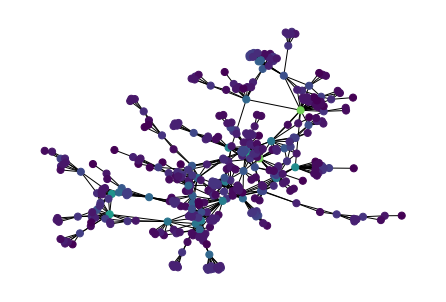

In [43]:
nx.draw(G,node_color=color, node_size=50)

In [44]:
dic1 = nx.betweenness_centrality(G)
sizes = np.array([dic1[nodo] for nodo in G])

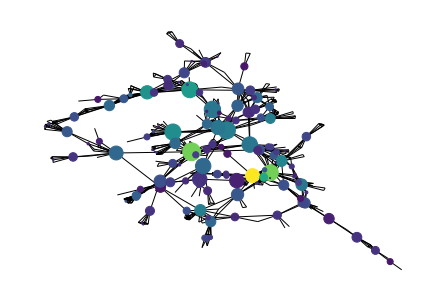

In [45]:
nx.draw(G,node_color=color, node_size=sizes**0.5*500)

In [46]:
pesos = np.array([w['w'] for (a,b,w) in list(G.edges(data=True))])


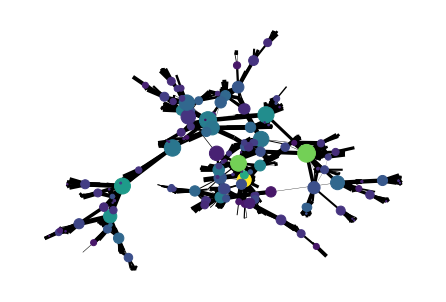

In [47]:
nx.draw(G,
       node_color =color,
       node_size=sizes**0.5*500,
       width=pesos*5)

# 14 de Septiembre, 2022. (Semana 4)

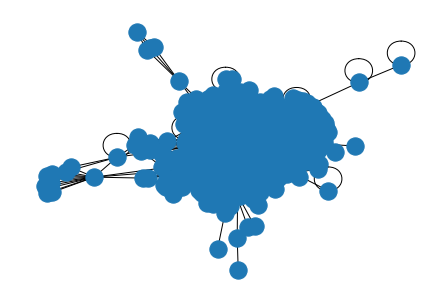

In [48]:
ruta ="bio-celegans-dir/bio-celegans-dir.edges"
f = open(ruta,'r')
lineas = f.readlines()
f.close()

g = nx.Graph()
for linea in lineas:
    if linea[0] == "%":continue
    n1, n2 = linea[:-1].split(' ')
    n1, n2 = int(n1), int(n2)
    g.add_edge(n1,n2)
nx.draw(g)    

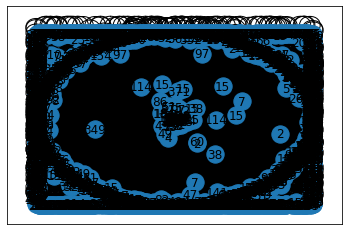

In [49]:
#Clickas: Comunidades, todos estan relacionados con todos.
list(nx.find_cliques(g))

for clica in nx.find_cliques(g):
    nx.draw_networkx(nx.subgraph(g,clica))
    #plt.show()

Vamos a ver propiedades de la red:
* Si es conexa
* Si tiene componentes conectadas
* Clickas (cx)
* Clustering
* Propiedades globales
    * Grado promedio
    * Clustering promedio
    * Diámetro
    * Distribución de grado

Vamos a comenzar con conexidad. Si es que la red está conectada.

In [50]:
#Conexidad, todos los nodos están conectados.
nx.is_connected(g)

True

Revisar [Ref] Think Complexity: Libro para sistemas complejos, redes, autómatas celulares.

In [51]:
#El algorítmo lo sacamos de think complexity
def alcanzable(g,inicial):#nodo inicial
    #usamos conjunto para tener una lista de un solo elemento
    vistos = set()
    stack = [inicial]
    while stack:
        nodo = stack.pop()
        if nodo not in vistos:
            vistos.add(nodo)#agregar
            stack.extend(g.neighbors(nodo))#tener a sus vecinos como pendientes, en el stack
    return vistos
        

In [52]:
#comparar las len del conjunto alcanzable con la len de la red
def es_conectada(G):
    return len(alcanzable(G,list(G.nodes)[0]))==len(G)

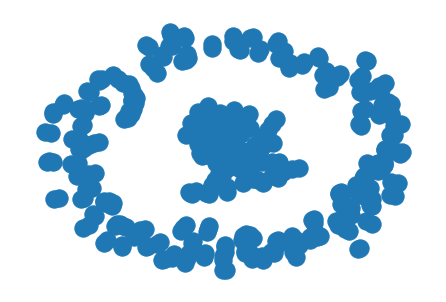

In [53]:
ruta ="reptilia-tortoise-network-fi-2011/reptilia-tortoise-network-fi-2011.edges"
f = open(ruta,'r')
lineas = f.readlines()
f.close()

g = nx.Graph()
for linea in lineas:
    if linea[0] == "%":continue
    n1, n2 = linea[:-1].split(' ')
    n1, n2 = int(n1), int(n2)
    g.add_edge(n1,n2)
nx.draw(g) 

In [54]:
es_conectada(g)
nx.is_connected(g)

False

In [55]:
comp1 = alcanzable(g,1)
comp2 = alcanzable(g,2)
#hacer un algorítmo recursivo

In [56]:
len(list(nx.connected_components(g)))

99

In [57]:
#lista de componentes aisladas
componentes = list(nx.connected_components(g))

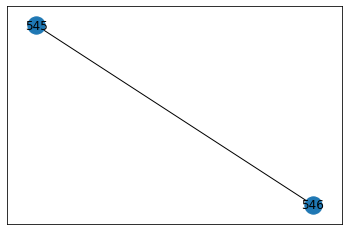

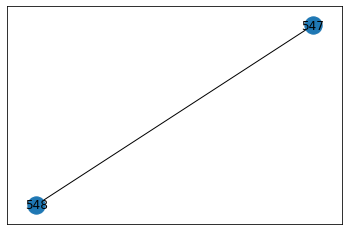

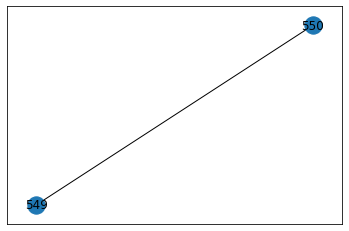

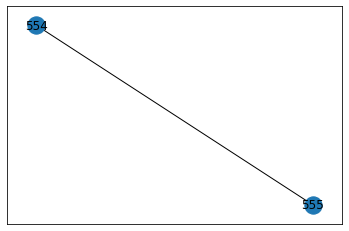

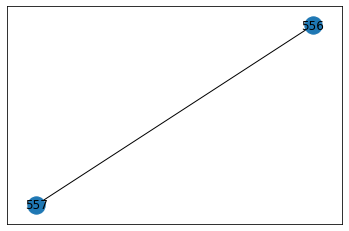

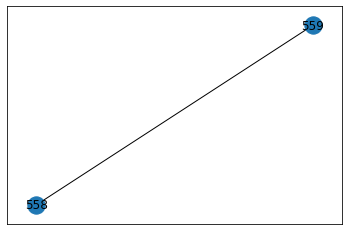

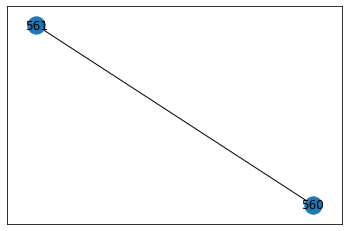

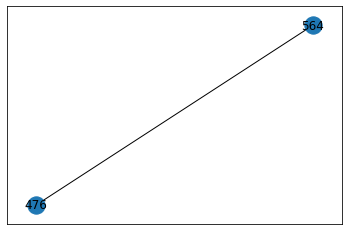

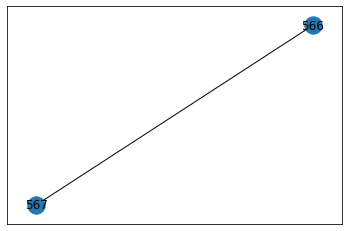

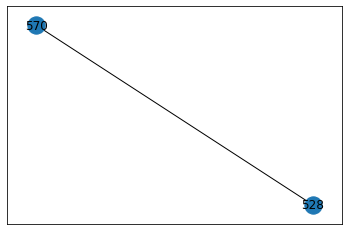

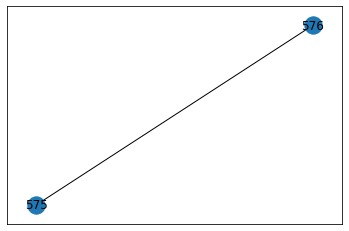

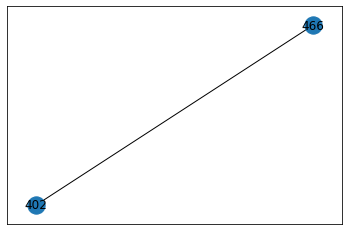

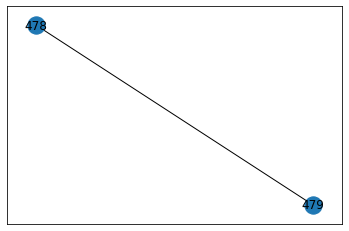

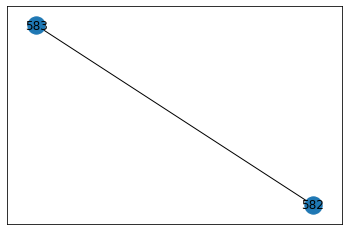

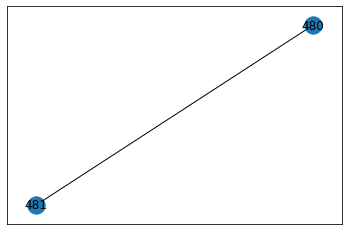

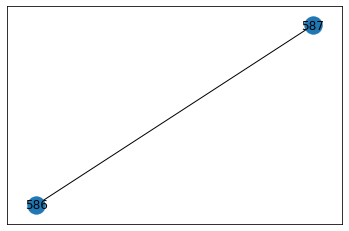

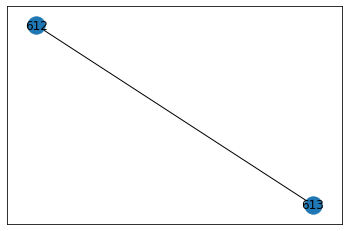

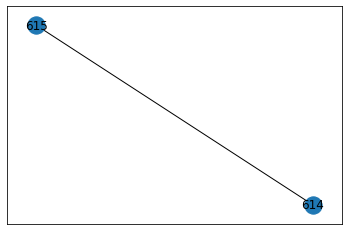

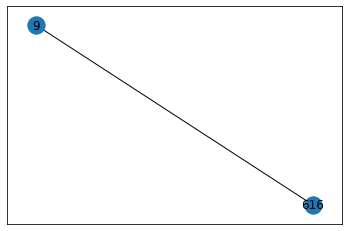

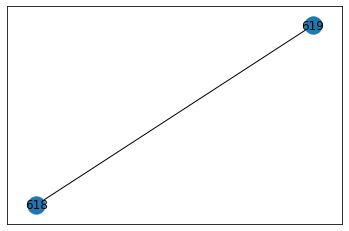

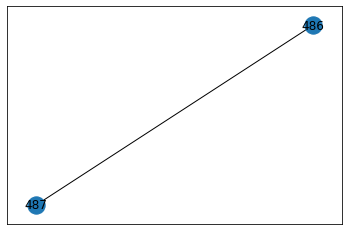

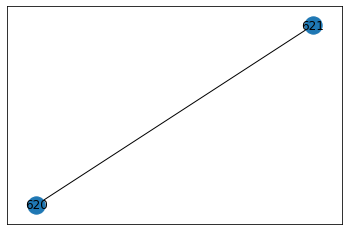

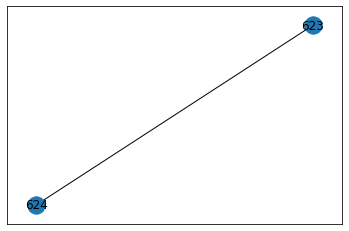

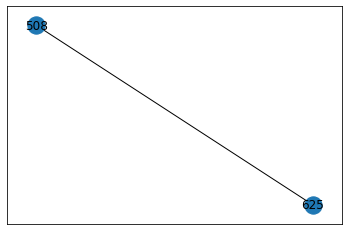

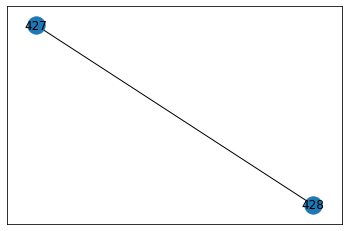

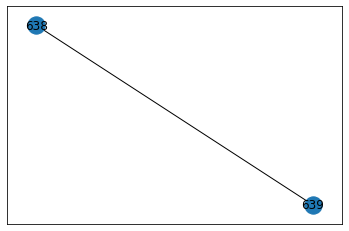

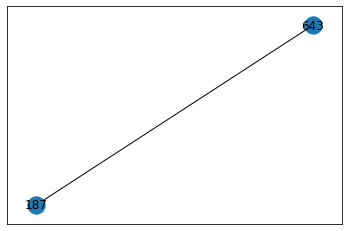

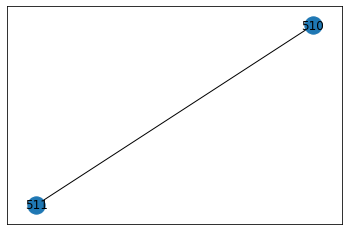

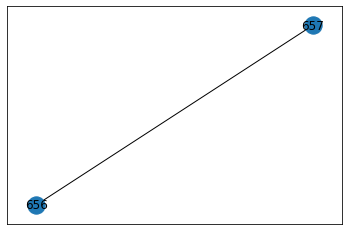

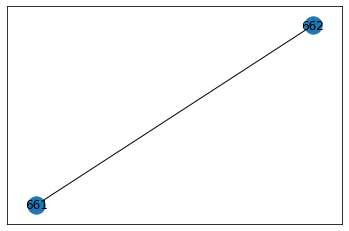

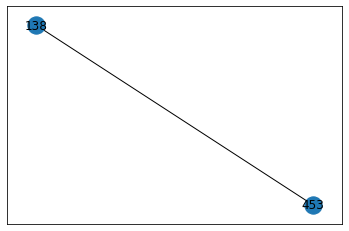

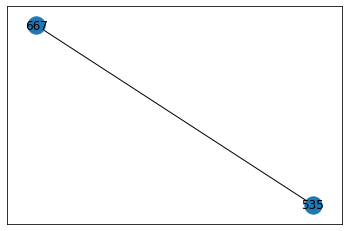

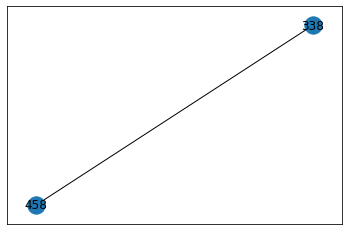

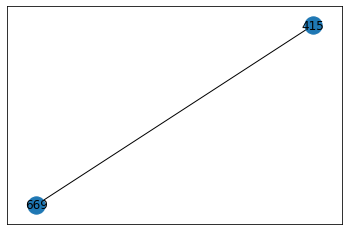

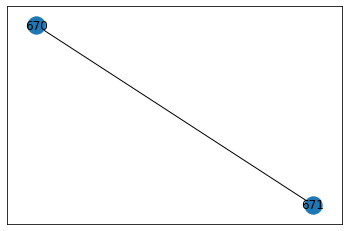

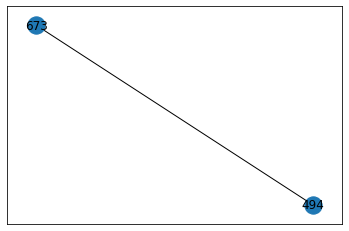

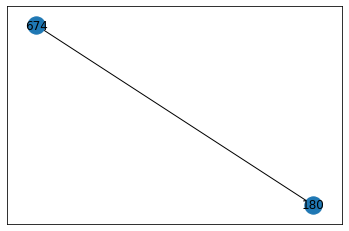

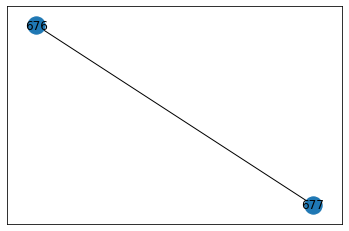

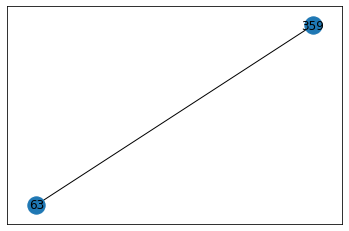

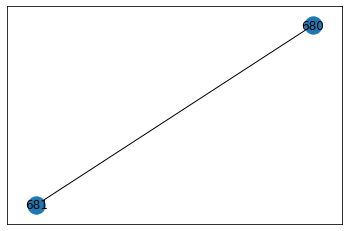

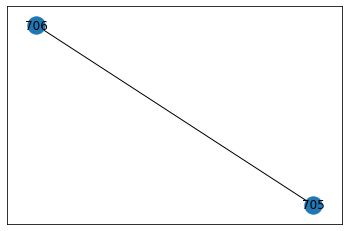

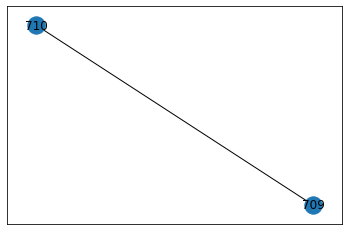

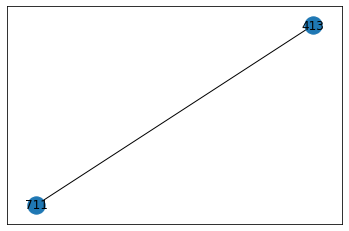

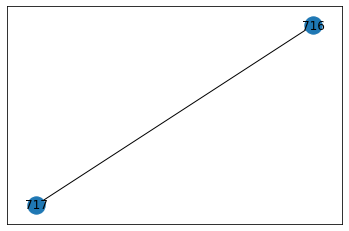

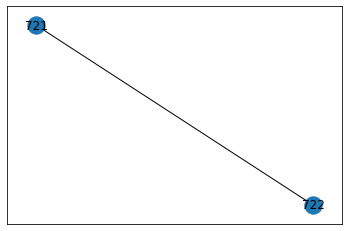

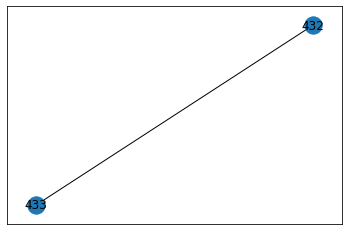

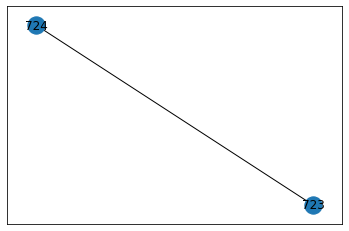

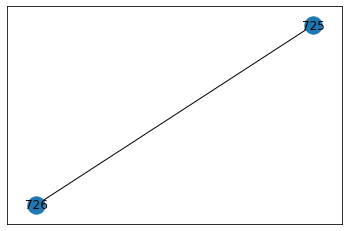

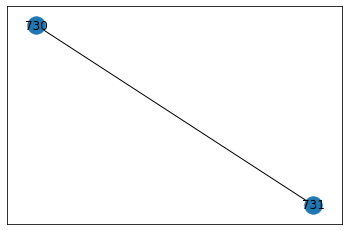

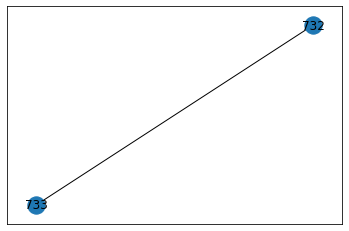

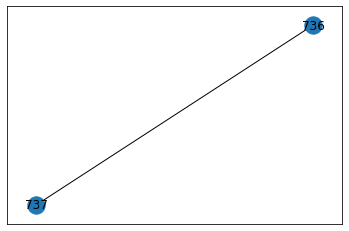

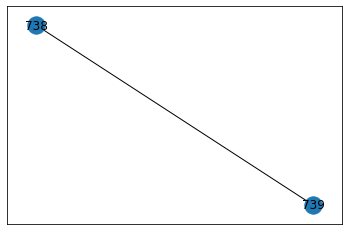

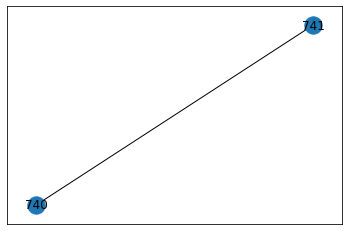

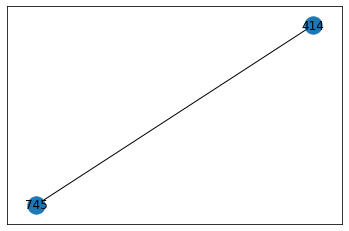

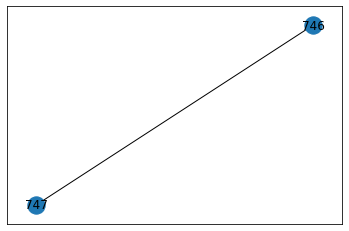

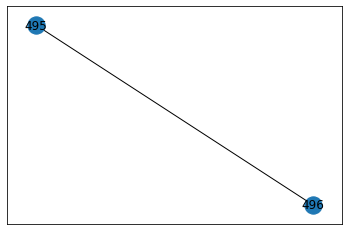

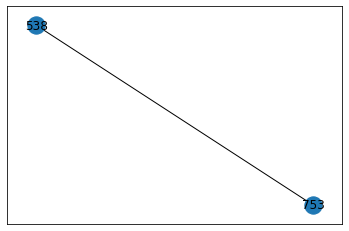

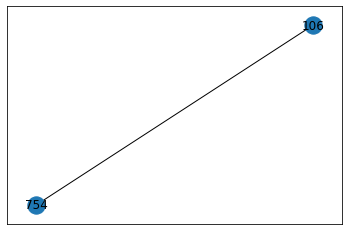

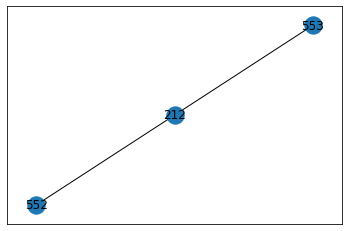

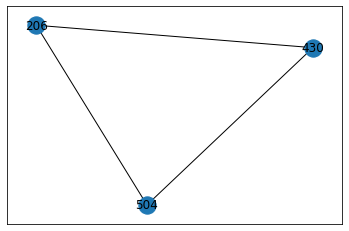

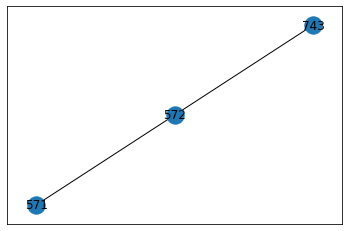

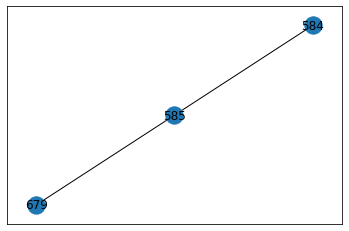

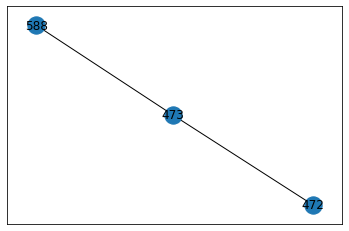

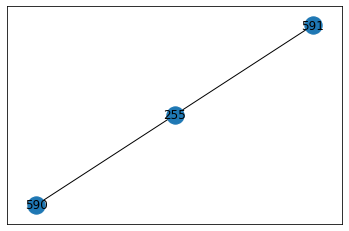

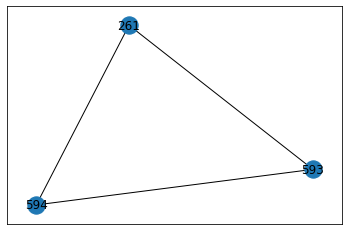

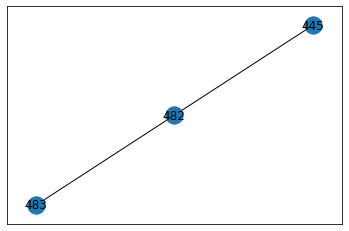

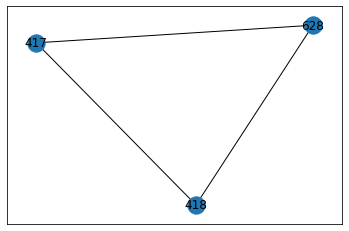

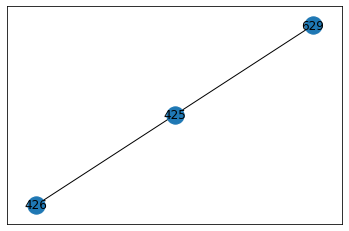

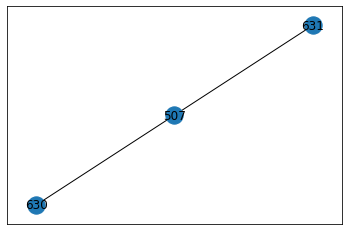

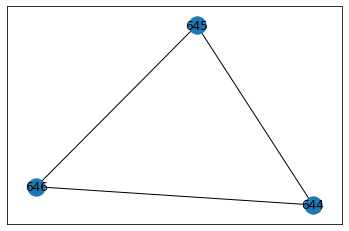

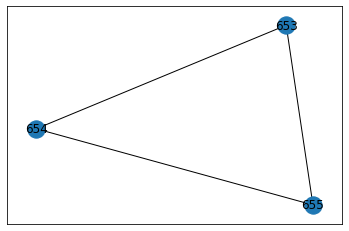

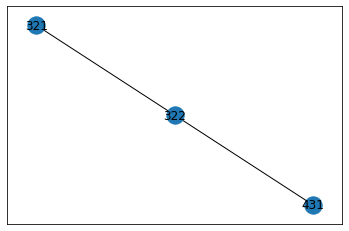

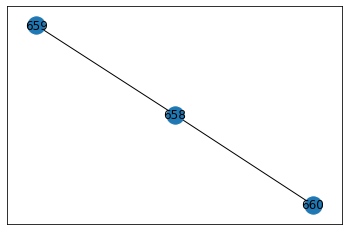

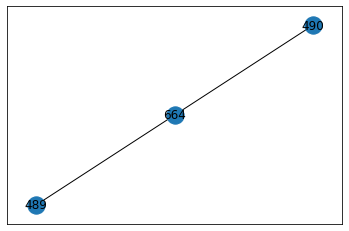

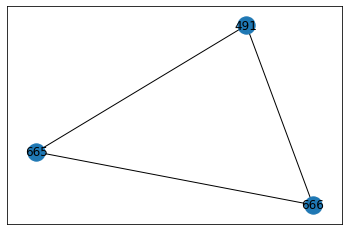

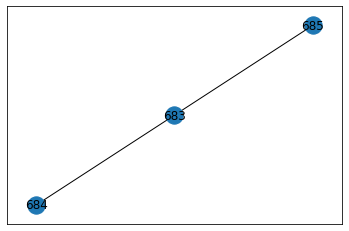

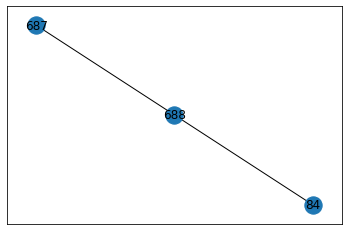

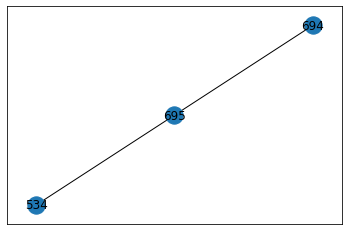

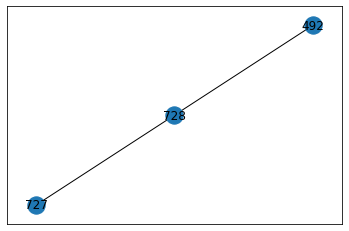

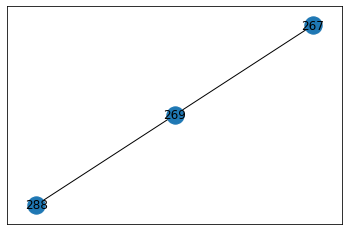

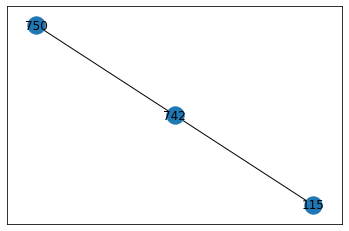

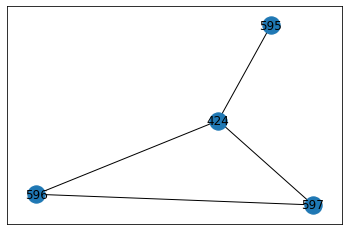

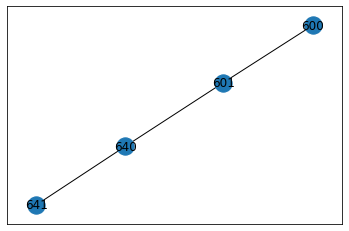

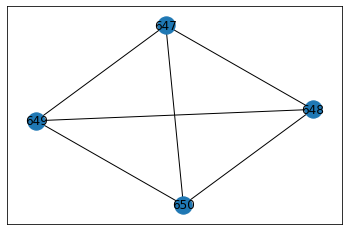

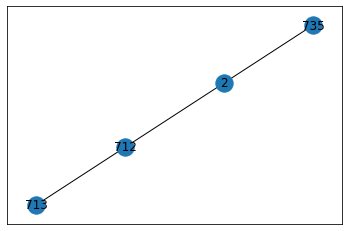

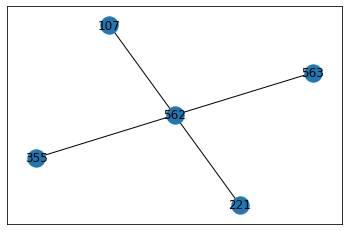

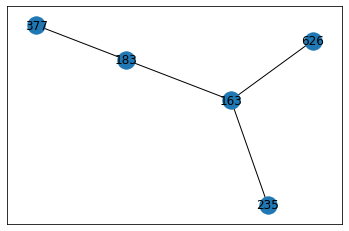

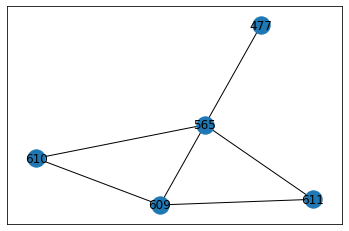

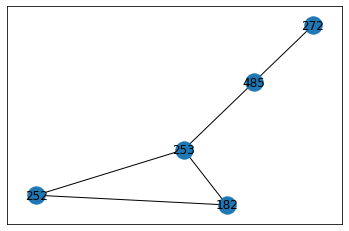

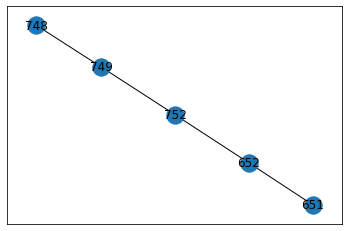

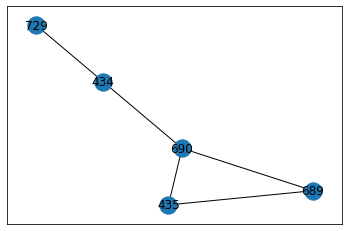

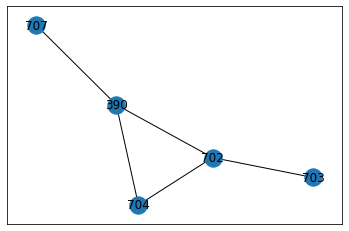

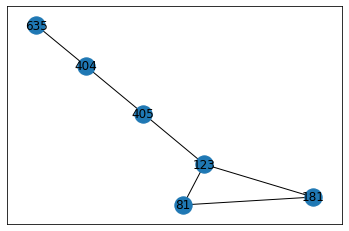

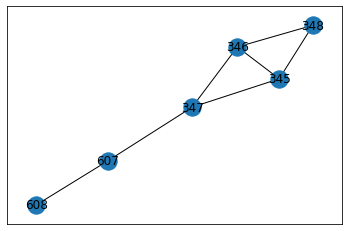

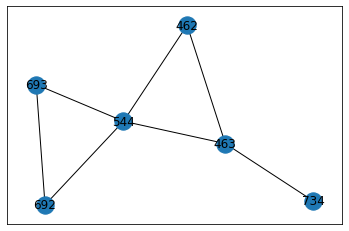

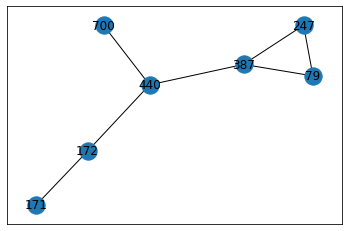

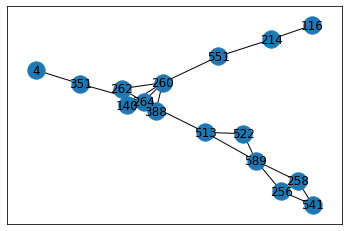

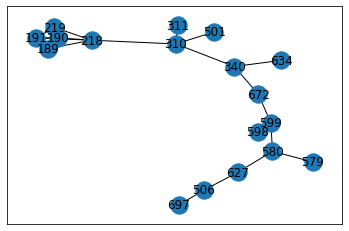

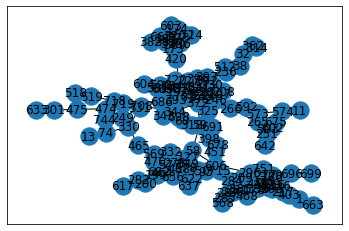

In [58]:
for componente in sorted(componentes,key=len):
    nx.draw_networkx(nx.subgraph(g,componente))
    plt.show()

In [59]:
sorted(componentes,key=len)

[{545, 546},
 {547, 548},
 {549, 550},
 {554, 555},
 {556, 557},
 {558, 559},
 {560, 561},
 {476, 564},
 {566, 567},
 {528, 570},
 {575, 576},
 {402, 466},
 {478, 479},
 {582, 583},
 {480, 481},
 {586, 587},
 {612, 613},
 {614, 615},
 {9, 616},
 {618, 619},
 {486, 487},
 {620, 621},
 {623, 624},
 {508, 625},
 {427, 428},
 {638, 639},
 {187, 643},
 {510, 511},
 {656, 657},
 {661, 662},
 {138, 453},
 {535, 667},
 {338, 458},
 {415, 669},
 {670, 671},
 {494, 673},
 {180, 674},
 {676, 677},
 {63, 359},
 {680, 681},
 {705, 706},
 {709, 710},
 {413, 711},
 {716, 717},
 {721, 722},
 {432, 433},
 {723, 724},
 {725, 726},
 {730, 731},
 {732, 733},
 {736, 737},
 {738, 739},
 {740, 741},
 {414, 745},
 {746, 747},
 {495, 496},
 {538, 753},
 {106, 754},
 {212, 552, 553},
 {206, 430, 504},
 {571, 572, 743},
 {584, 585, 679},
 {472, 473, 588},
 {255, 590, 591},
 {261, 593, 594},
 {445, 482, 483},
 {417, 418, 628},
 {425, 426, 629},
 {507, 630, 631},
 {644, 645, 646},
 {653, 654, 655},
 {321, 322, 431

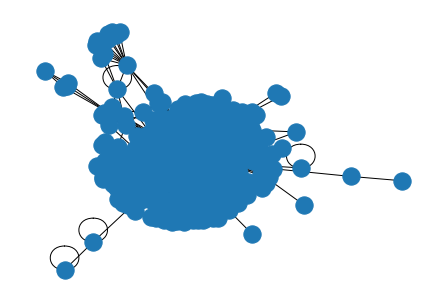

In [60]:
ruta ="bio-celegans-dir/bio-celegans-dir.edges"
f = open(ruta,'r')
lineas = f.readlines()
f.close()

g = nx.Graph()
for linea in lineas:
    if linea[0] == "%":continue
    n1, n2 = linea[:-1].split(' ')
    n1, n2 = int(n1), int(n2)
    g.add_edge(n1,n2)
nx.draw(g)    

In [61]:
len(list(nx.find_cliques(g)))

668

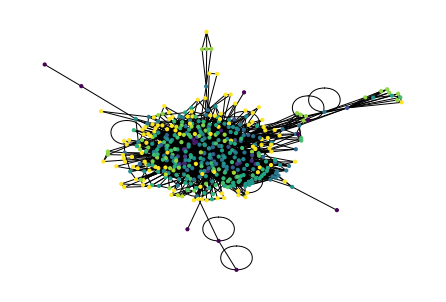

In [62]:
#Tendencia a formar clikas, esta función se toma como medida de centralidad
dic = nx.clustering(g)

color = np.array([dic[nodo] for nodo in g])
nx.draw(g,node_color=color,node_size=10)

In [63]:
#Grado por cada nodo
diccionario = dict(g.degree)
grados = [diccionario[nodo] for nodo in g]

In [64]:
range(max(grados)+1)
max(grados)

239

In [65]:
y,x = np.histogram(grados,bins = range(max(grados)+1))

In [66]:
y

array([ 0,  4, 13, 85, 59, 73, 69, 28, 22, 18, 17, 10,  9,  3,  2,  6,  3,
        1,  1,  1,  0,  3,  0,  3,  2,  0,  1,  0,  1,  0,  1,  0,  0,  1,
        0,  1,  1,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  2,  0,  1,  0,  1,  2,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [67]:
x

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

<BarContainer object of 239 artists>

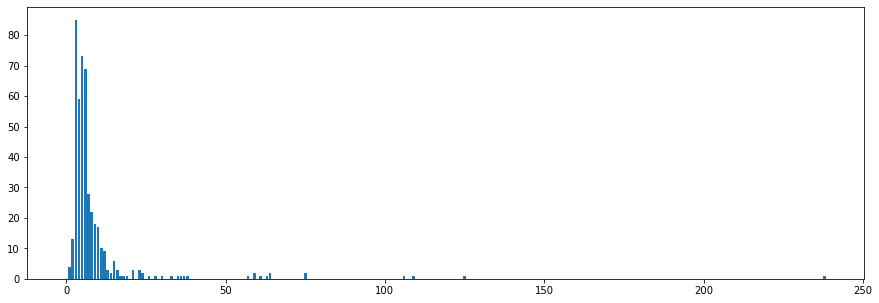

In [68]:
plt.figure(figsize=[15,5])
plt.bar(x[:-1],y)


In [69]:
#promedio del total de enlaces, clustering promedio
nx.average_clustering(g)


0.6464630921565053

In [70]:
#la geodésica más grande 
nx.diameter(g)

7

In [71]:
#Grado promedio
len(g.edges)/len(g.nodes) /2
# Corrección
2*len(g.edges)/len(g.nodes)

9.006622516556291

# Clase 21 de Septiembre, 2022 (Sesión 5)

**Resumen:** Cargar las redes vía pandas (pandas especializado en análisis de datos)

In [72]:
ruta = '/home/rogve98/Documentos/C13(N)C1AS/Ciencia de Redes/Tareas/econ-poli-large/econ-poli-large.mtx'

#buen hábito, poner los siguientes argumentos
tabla = pd.read_csv(ruta,
           #nrows = 10,
           skiprows = 14,
           header = None,
           sep = ' ')

tabla = tabla[ tabla[0] != tabla[1] ]

In [73]:
#Tipo: esquema de datos, DataFrame
type(tabla)

pandas.core.frame.DataFrame

In [74]:
tabla.describe()

0             1             2
count  17499.000000  17499.000000  17499.000000
mean    5984.203154   7589.361221     -0.739752
std     4652.995823   4517.703043      0.339376
min        1.000000      2.000000     -1.000000
25%     1772.000000   3629.500000     -1.000000
50%     4883.000000   7475.000000     -1.000000
75%     9808.000000  11466.500000     -0.500000
max    15570.000000  15575.000000      0.000000

In [75]:
g = nx.from_pandas_edgelist(df = tabla, source = 0, target = 1)

In [76]:
#Con el paso de la primera celda eliminamos los autoenlaces
L=len(g.edges)
N = len(g)

In [77]:
2*L/N

2.2430818619582666

In [78]:
nx.is_connected(g)

True

In [79]:
c_max = max(list(nx.connected_components(g)), key = len)

In [80]:
#Y con esto nos quedamos con la componente más grande de una red disconexa.
g1 = nx.subgraph(g, c_max)

In [81]:
g = nx.from_pandas_edgelist(
    pd.read_csv(ruta,
           #nrows = 10,
           skiprows = 14,
           header = None,
           sep = ' ')
    , source = 0, target = 1)

In [82]:
#G.remove_edges_from(self)

## Red de facebook de 3M de nodos

In [83]:
ruta = '/home/rogve98/Documentos/C13(N)C1AS/Ciencia de Redes/Tareas/socfb-A-anon/socfb-A-anon.mtx'

g = nx.from_pandas_edgelist(
    pd.read_csv(ruta,
                #nrows = 10,
                skiprows = 2,
                header = None,
                sep = ' '),
    source = 0, target = 1)

In [84]:
len(g.nodes)

3097165

### usar: sudo swapoff -a ; sudo swapon -a para liberar memoria de intercambio. Después de cerrar el notebook

# Clase 28 de Septiembre, 2022. (sesión 6)

Vamos a explorar en clase la red GNL, (número de nodos, número de enlaces).

## Modelo GNL de redes aleatorias

In [44]:
np.random.rand(5,2)

array([[0.74251617, 0.92662217],
       [0.67195628, 0.01697744],
       [0.87750861, 0.51808905],
       [0.49051772, 0.57058825],
       [0.67349678, 0.62080605]])

In [45]:
#puede comer enteros o listas para elegir aleatoriamente alguno de los elmeentos de la lista
#p es para generar una distribución de probabilidad p=np.array([0.8,0.5]), pobabilidad del 1 80% y asi
np.random.choice(10)

1

In [46]:
# se puede jugar con arrays
np.random.choice(10,2)

array([0, 0])

In [116]:
N = 100
L = 150
nodos = np.random.choice(N,[L,2])

In [55]:
nodos[:,0] != nodos[:,1]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [129]:
#Arroja los que son auto enlaces, esto resuelve el problema de los auto enlaces
nodos = nodos[nodos[:,0] != nodos[:,1]]
len(nodos)

145

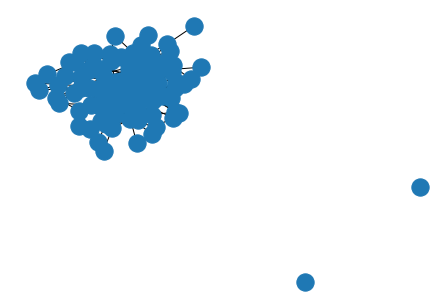

In [90]:
# Generamos la función GNL con todos los elementos reunidos hasta ahora
def GNL(N,L):
    nodos = np.random.choice(N,[L,2])
    
    nodos = nodos[nodos[:,0] != nodos[:,1]]
    
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(nodos)

    while len(G.edges) < L:
        #elegimos un nodo de la red G; con esto corregimos los multi enlaces
        nodo1 = np.random.choice(G)
        nodo2 = np.random.choice(list( set(G)-{nodo1} ))
        G.add_edge(nodo1,nodo2)
        
    return G

g = GNL(100,200)
nx.draw(g)

In [91]:
len(g)
len(g.edges)

200

Problema que emerge estan los multi enlaces y los auto enlaces, los multi son aquellos que aparecen más de una vez, es decir (5,6) aparece 3 veces por ejemplo.

# Anexo de redes aleatorias de la semana 6

Me atrasé un poquito ya que esta sección debería de estar antes de la semana 6, y justo la semana 6 era revisar y complementar teoría de redes aleatorias.

In [3]:
def enlacesAleatorios(N,p):
    for i in range(N):
        for j in range(i):
            if np.random.rand() < p:
                yield i,j
                
def redAleatoria(N,p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    G.add_edges_from(enlacesAleatorios(N,p))
    
    return G

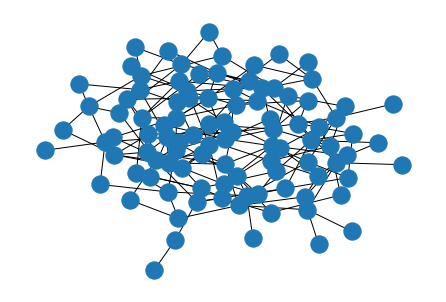

In [25]:
g = redAleatoria(100,0.04)
nx.draw_kamada_kawai(g)

In [4]:
len(g.edges)

97

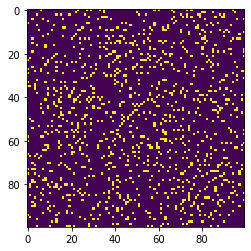

In [4]:
N = 100
p = 0.1

A = np.triu(np.ones((N,N)),k=1)*(np.random.rand(N,N) < p)
A = A.T+A

plt.imshow(A,interpolation="none")

In [5]:
def redAleatoriaM(N,p):
    A = np.triu(np.ones((N,N)),k=1)*(np.random.rand(N,N) < p)
    A = A.T+A
    
    return nx.from_numpy_array(A)    

188

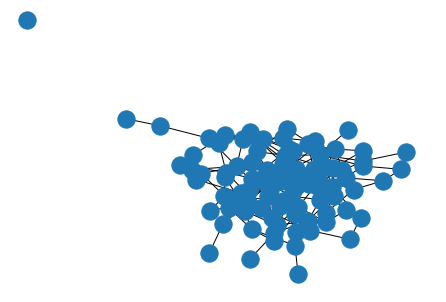

In [6]:
g1 = redAleatoriaM(100,0.04)
nx.draw(g1)

len(g1.edges)

In [78]:
# Ejercicio 2: Valor esperado de enlaces (L)
N = 100
p = 0.2

corridas = 100

L = []

for i in range(corridas):
    g = redAleatoria(N,p)
    l = len(g.edges)
    L.append(l)
    
print("El valor esperado de L es: ",np.mean(L) )

El valor esperado de L es:  990.09


In [79]:
y, x = np.histogram(L, bins = range(int(N*(N-1)/2)))

(900.0, 1100.0)

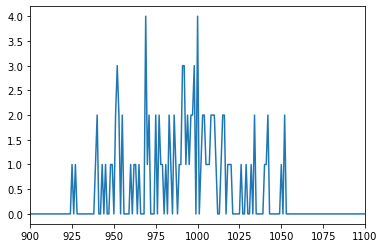

In [81]:
plt.plot(x[:-1], y)
xmin = 900
xmax = 1100
plt.xlim([xmin, xmax])

In [128]:
# Ejercicio 4: Coeficiente de acumulación promedio

N = 50
p = 0.1

G = redAleatoria(N,p)
print('El coeficiente de acumulación promedio es:\n', nx.average_clustering(G))

El coeficiente de acumulación promedio es:
 0.10246897546897546


<BarContainer object of 99 artists>

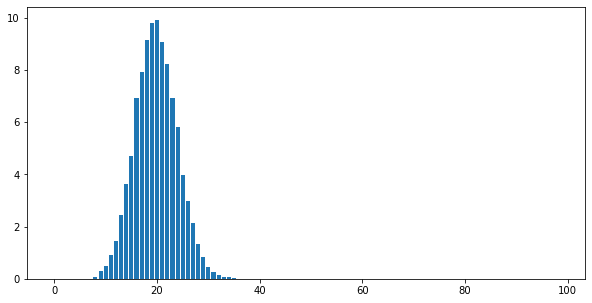

In [83]:
# Ejercicio 5: Distribución de grado

N = 100
p = 0.2

corridas = 100

Y = np.zeros(N-1)
for i in range(corridas):
    G = redAleatoria(N,p)
    y, x = np.histogram([dict(G.degree)[i] for i in G], bins = range(N))
    Y += y
    
Y = Y/corridas

plt.figure(figsize = [10,5])
plt.bar(x[:-1],Y)

# Continuación de actividades, 11 Octubre, 2022.

Derivado del paro, con el de esta semana serán dos clases a las que no podremos acudir. Sin embargo hay actividades por hacer sobre el tema de redes aleatoria con base en distribución binomial.También se revisará la distribución de Poisson y finalmente se hara una comparación entre redes aleatorias y redes reales.

Las redes con una distribución de Poisson se asemejan más a la redes reales y conforme vayamos avanzando veremos porque el modelo de red aleatoria no es adecuado para describir redes reales.

In [4]:
from scipy.stats import binom 
from scipy.stats import poisson

Vamos a comenzar con la **distribucción de probabilidad de grado**. Recuperamos la celda del ejercicio y le hacemos algunas modificaciones.

Text(0.5, 1.0, 'Red aleatoria, N = 101, p = 0.70')

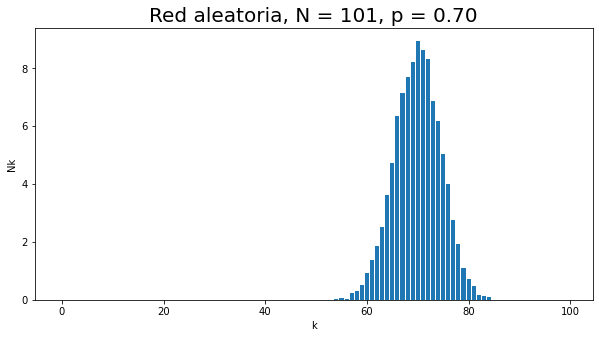

In [6]:
""" Pedimos prestadas las funciones enlacesAleatorios y redAleatoria. """

N = 101
p = .7
corridas = 100


Y = np.zeros(N-1)

for i in range(corridas):
    G = redAleatoria(N,p)
    y, x = np.histogram([dict(G.degree)[i] for i in G], bins = range(N))
    Y += y
Y = Y/corridas

plt.figure(figsize = [10,5])
plt.bar(x[:-1],Y)
plt.xlabel('k', size = 10)
plt.ylabel('Nk', size = 10)
plt.title('Red aleatoria, N = %i, p = %1.2f' %(N,p), size = 20)

Hasta aquí no se ha hecho nada nuevo, únicamente revisar la distribución de grado en términos de una cierta probabilidad. 

"La única modificación que se hará a partir de ahora es aquella referente a pasar de a , es decir, pasar del histograma a la distribución de probabilidad mediante $P_k=N_k/N$. Esto se puede hacer directamente utilizando el parámetro `density` de la función `np.histogram.`"

En otras palabras estaremos dibujando la distribución bionomial del histograma bajo ciertos parámetros

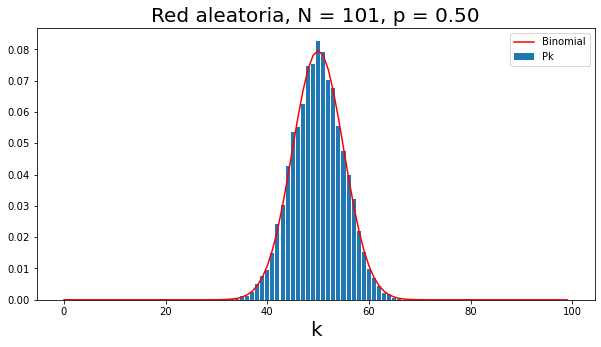

In [7]:
# Se definen los parámetros
N = 101
p = .5
corridas = 100

# Y es el arreglo en el que se acumularán las observaciones para luego promediarlas
Y = np.zeros(N-1)

for i in range(corridas):
    G = redAleatoria(N,p)
    y, x = np.histogram([dict(G.degree)[i] for i in G], bins = range(N), density = True)
    Y += y

# Se obtiene el promedio sobre todas las corridas
Y = Y/corridas


# Se genera la gráfica
plt.figure(figsize = [10,5])
# La distribución de probabilidad como gráfica de barras
plt.bar(x[:-1],Y, label = 'Pk') 

# La distribución binomial como una línea roja. Se grafica la función binomial de x, contra x.
plt.plot(x[:-1], binom.pmf(x[:-1],N-1,p), 'r', label = 'Binomial')

# Se ponen los títulos de los ejes y la gráfica
plt.xlabel('k', size = 20)
plt.title('Red aleatoria, N = %i, p = %1.2f' %(N,p), size = 20)
plt.legend()

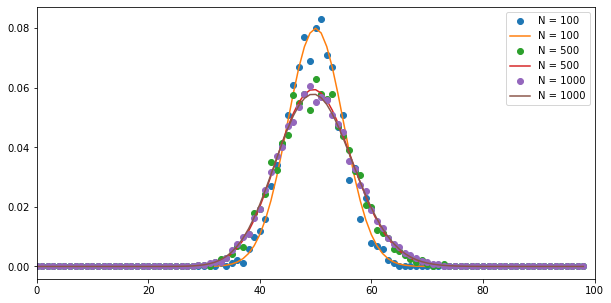

In [11]:
k = 50 # se fija el valor para el grado promedio. La única condición es que debe ser menor que N. 


corridas = 10 # se puede variar el número de corridas. Si es demasiado alto puede tardar mucho para redes grandes


plt.figure(figsize = [10,5])
for N in [100, 500, 1000]: #se tomarán tres redes distintas, para N igual a 100, 500 y 1000. Pueden agregar más grandes pero es posible que tarde mucho
    p = k/(N-1)
    
    Y = np.zeros(100-1)

    for i in range(corridas):
        G = redAleatoria(N,p)
        y, x = np.histogram([dict(G.degree)[i] for i in G], bins = range(100), density = True)
        Y += y
    Y = Y/corridas



    

    plt.plot(x[:-1],Y, 'o', label = 'N = '+str(N))
    plt.plot(x[:-1],binom.pmf(x[:-1],N-1,p),label = 'N = '+str(N))

plt.xlim([0,100])
plt.legend()

De esta manera terminamos de ver que la distribución binomial se ajusta al modelo de redes aleatorias. Entonces ahora veremos que condiciones deben tener $N$ y $\langle k\rangle$ para poder trabajar con una distribución de Poisson.

Se debe aclarar que esto ya es trabajr directamente con las distribuciones ya que puede ser complicado trabajar con redes muy grandes de 100 000 nodos. A continuación fijamos $k$ y probamos para cuatro diferentes ordenes de magnitud y comparamos con la distribución de Poisson.

Text(0, 0.5, 'pmf(k)')

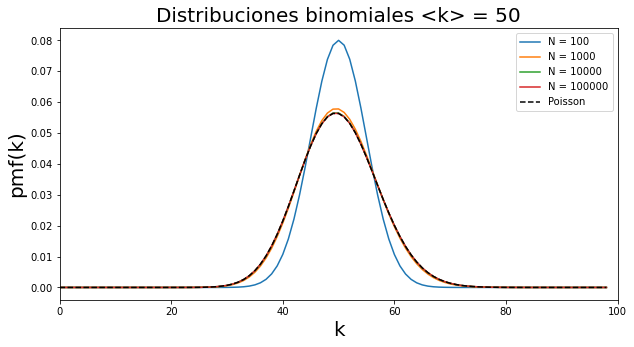

In [5]:
plt.figure(figsize = [10,5])

k = 50
x = np.arange(100)

# Se utilizan cuatro N's en cuatro órdenes:
for N in [10**2, 10**3, 10**4, 10**5]:
    p = k/(N-1)

    plt.plot(x[:-1],binom.pmf(x[:-1], N-1, p), label = 'N = '+str(N))

    

plt.xlim([0,100])

plt.plot(x[:-1], poisson.pmf(x[:-1], 50), 'k--', label = 'Poisson')

plt.legend()
plt.title('Distribuciones binomiales <k> = 50', size = 20)
plt.xlabel('k', size = 20)
plt.ylabel('pmf(k)', size = 20)

#plt.xlim([45, 55])
#plt.ylim([0.05, 0.06])

El coeficiente de acumulación promedio es:  0.39837712702098704
La probabilidad de enlace p es:  0.4


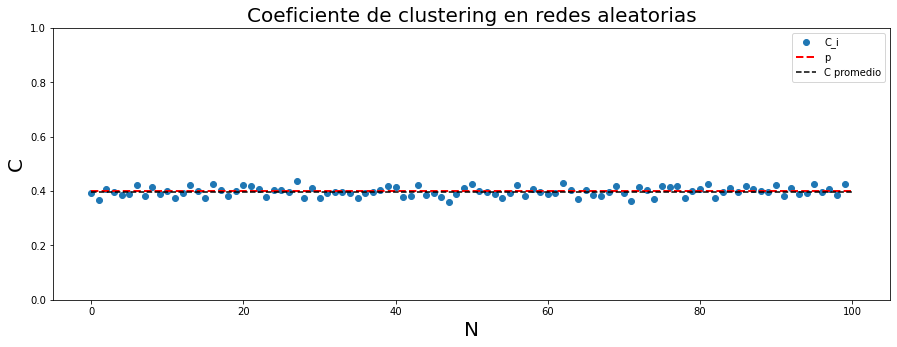

In [40]:
N = 100
p = .4



G = redAleatoria(N,p)
C = nx.average_clustering(G)
print('El coeficiente de acumulación promedio es: ',C)
print('La probabilidad de enlace p es: ',p)

diccionario = nx.clustering(G)
Y = [diccionario[i] for i in G]

plt.figure(figsize = [15,5])
plt.plot(Y, 'o', label = 'C_i')
plt.plot([0,N], [p,p], 'r--', linewidth = 2, label = 'p')
plt.plot([0,N], [C,C], 'k--', label = 'C promedio')
plt.ylim([0,1])
plt.title("Coeficiente de clustering en redes aleatorias",size=20)
plt.xlabel("N",size=20)
plt.ylabel("C",size=20)

plt.legend(prop={'size': 10})

## Comparando modelo de redes aleatorias con redes reales

Vamos a trabajar con las redes que habíamos trabajado en la práctica2.

In [3]:
ruta = 'rec-amazon-ratings/rec-amazon-ratings.edges'

datos = pd.read_csv(ruta,
            #nrows = 10,
            #skiprows = 2,
            header = None,
            sep = ',',
            usecols = [0,1]
            )
datos

0        1
0              1        1
1              1        2
2              1        3
3              1        4
4              1        5
...          ...      ...
5838036  2146054  1230915
5838037  2146054   174742
5838038  2146055   140015
5838039  2146056   592972
5838040  2146057   147758

[5838041 rows x 2 columns]

In [4]:
g = nx.from_pandas_edgelist(datos,source = 0, target = 1)
#nx.draw(g,node_size=100,node_color='red')

In [5]:
N = len(g)
L = len(g.edges)
k = 2*L/N
C = nx.average_clustering(g)

p = k / (N-1)
print('Propiedades generales de tu red:')
print('- El número de nodos es:\t', N)
print('- El número de enlaces es:\t', L)
print('- El grado promedio es:\t\t', k)

print('\n\nEl coeficiente de clustering promedio de la red es:\n', C)
print('\nEl coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:\n', p)

Propiedades generales de tu red:
- El número de nodos es:	 2146057
- El número de enlaces es:	 5743146
- El grado promedio es:		 5.352277222832385


El coeficiente de clustering promedio de la red es:
 0.0003996378886352111

El coeficiente de clustering que tendría la red si fuera aleatoria (es decir p) es:
 2.4940063180235674e-06


In [6]:
# se generan los diccionarios
grado_dict = dict(nx.degree(g))
clustering_dict = nx.clustering(g)

In [7]:
# se genera el dataframe (la tabla)
df = pd.DataFrame([grado_dict, clustering_dict]).T
df.columns = ['Degree', 'Clustering']

In [8]:
df.Degree#.values
K=df.Degree.max()

In [9]:
y, x = np.histogram(df.Degree.values,bins = range(int(K)+1),density=True)

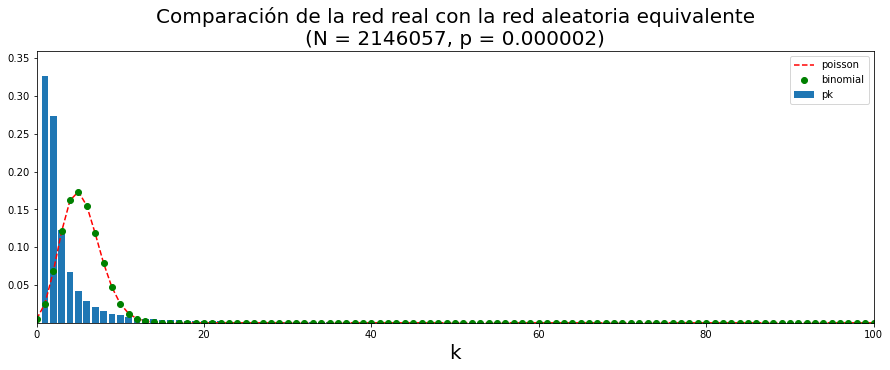

In [10]:
plt.figure(figsize = [15,5])
plt.bar(x[:-1], y, label = 'pk')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson') 
plt.plot(x[:-1], binom.pmf(x[:-1],N-1, p), 'go', label = 'binomial') 


plt.ylim([0.5*y[y>0].min(),1.1*y.max()])
plt.xlim([0,100])
plt.legend()
plt.title('Comparación de la red real con la red aleatoria equivalente\n(N = %i, p = %.6f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)
plt.savefig("distpoibin")

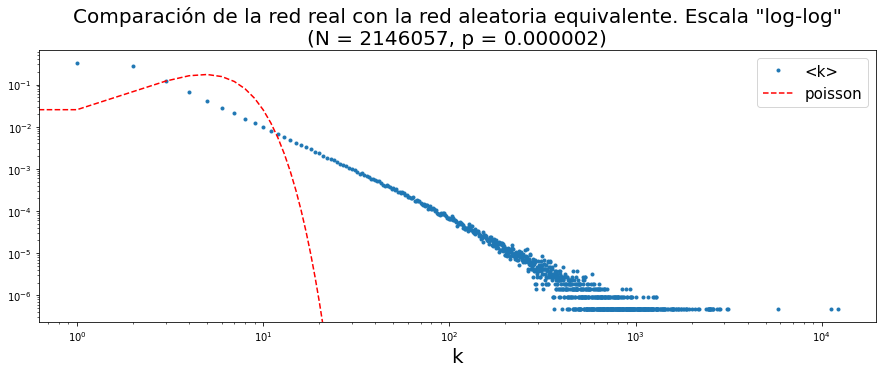

In [21]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1], y, '.', label = '<k>')
plt.plot(x[:-1], poisson.pmf(x[:-1], k), 'r--', label = 'poisson')
#plt.plot(x[:-1], binom.pmf(x[:-1],N-1, p), 'go', label = 'binomial') 

#Se aplica escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

#parámetros adecuados para la visualización:
plt.ylim([0.5*y[y>0].min(),2*y.max()])


plt.title('Comparación de la red real con la red aleatoria equivalente. Escala "log-log"\n(N = %i, p = %.6f)' %(N,p), size = 20)
plt.xlabel('k', size = 20)

plt.legend(prop= {'size':15})
plt.savefig("DistPoi")

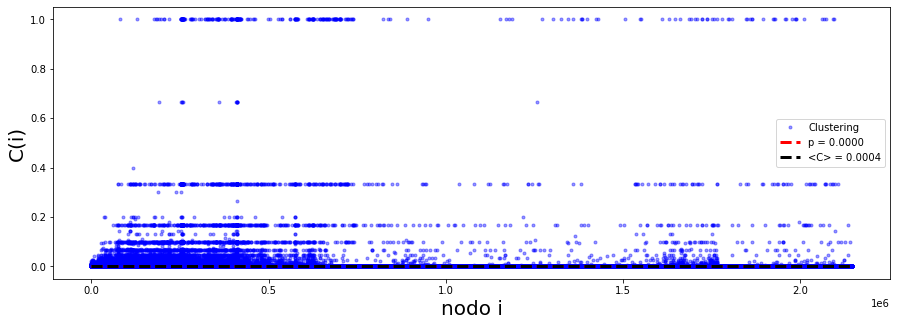

In [50]:
plt.figure(figsize = [15,5])
df.Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

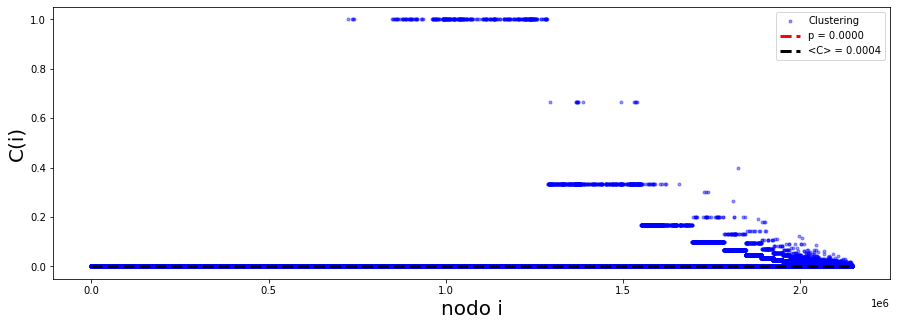

In [51]:
plt.figure(figsize = [15,5])
df.sort_values('Degree').reset_index().Clustering.plot(style = 'b.', alpha = .4)

plt.plot([0,N], [p,p], 'r--', linewidth = 3, label = 'p = %.4f' %p)
plt.plot([0,N], [C,C], 'k--', linewidth = 3, label = '<C> = %.4f' %C)

plt.xlabel('nodo i', size = 20)
plt.ylabel('C(i)', size = 20)
plt.legend()

In [16]:
X, Y = df.groupby('Degree')['Clustering'].mean().reset_index().values.T

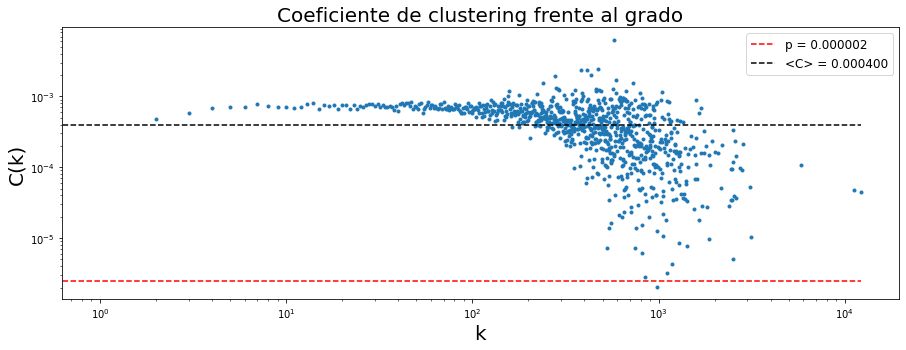

In [26]:
plt.figure(figsize=[15,5])
plt.plot(X, Y, '.')

plt.plot([0,K], [p,p], 'r--', label = 'p = %.6f' %p)
plt.plot([0,K], [C,C], 'k--', label = '<C> = %.6f' %C)

plt.xlabel('k', size = 20)
plt.ylabel('C(k)', size = 20)

plt.xscale('log')
plt.yscale('log')
plt.title("Coeficiente de clustering frente al grado",size=20)

plt.legend(prop={'size':12})

plt.savefig("clusvsgrado")

# 26 de Octubre, 2022

Hoy voy a hacer una revisión de la práctica de mundo pequeño, ya que eso se vio en clase y solo se dio un repaso.

El modelo de Watts-Strogatz esta basado ajustarse a la propiedad de mundo pequeño y un clustering alto que  poseen las redes reales, para ello utilizan una red anillo para poder lograr el cometido. Definimos una red anillo con un parámetro extra que determina con cuántos vecinos están conectados los nodos.

In [2]:
#Red Anillo regular

def Anillo(N, l = 2):
    nodos = np.arange(N)
    G = nx.Graph()
    G.add_nodes_from( nodos )
    
    for i in range(l):
        G.add_edges_from( zip( nodos, np.roll(nodos, i+1) ) )
    return G

10 40


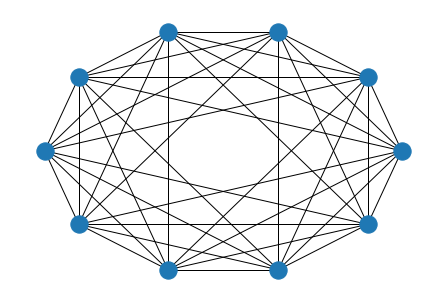

In [3]:
g = Anillo(10,4)
print(len(g),len(g.edges))
nx.draw_circular(g)

el coeficiente de clustering de la red es :  0.6666666666666666
el diámetro de la red es:  2
20 100
Distancia promedio más corta:  1.4736842105263157


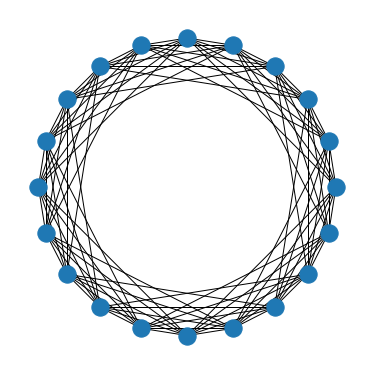

In [4]:
# juega con ambos parámetros para ver la estructura y el coeficiente de clustering
G = Anillo(20, 5) #
print('el coeficiente de clustering de la red es : ', nx.clustering(G)[0])
print("el diámetro de la red es: ",nx.diameter(G))
print(len(G),len(G.edges))
print("Distancia promedio más corta: ",nx.average_shortest_path_length(G))
plt.figure(figsize = [5,5])
nx.draw_circular(G)

N = 100
Clustering =  0.600000000000001
Diametro =  17


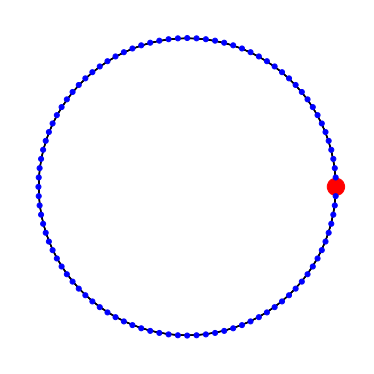

In [5]:
G = Anillo(100,3)

N = len(G)
tamanos = [300]
tamanos = tamanos + (N-1)*[25]
colores = ['red']
colores = colores + (N-1)*['blue']

print("N =",N)
print('Clustering = ', nx.average_clustering(G) ) 
print('Diametro = ', nx.diameter(G) ) 

plt.figure(figsize = [5,5])
nx.draw_circular(G, node_size = tamanos, node_color = colores,with_labels=False)
plt.show()




In [6]:
# Matriz de distancias y distancias caracteristicas

MatD0 = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD0[i,j] = nx.shortest_path_length(G, i, j)
dmin = np.min(MatD0)
dmax = np.max(MatD0)

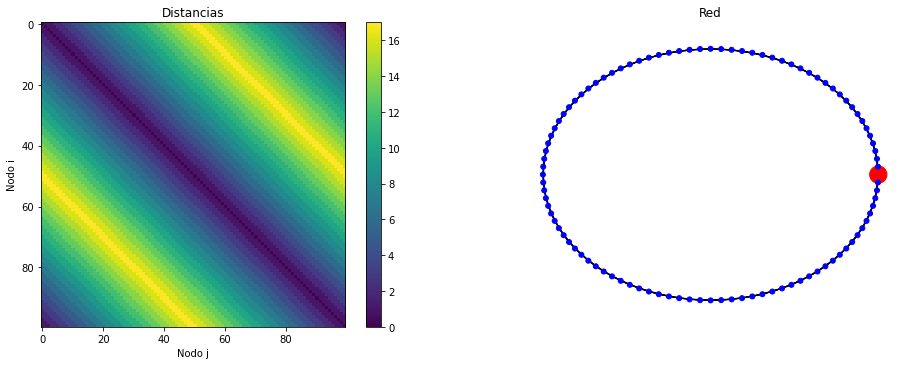

Distancia máxima entre nodos (diámetro): 	 17.0
Distancia promedio entre nodos: 		 8.67
Coeficiente de clustering promedio de la red: 	 0.600000000000001


In [7]:
h = 0.8 #parametro para jugar con el tamaño de la imagen
fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()

print('Distancia máxima entre nodos (diámetro): \t', np.max(MatD0))
print('Distancia promedio entre nodos: \t\t', np.mean(MatD0))
print('Coeficiente de clustering promedio de la red: \t', nx.average_clustering(G))

In [8]:
nodo1 = np.random.choice(G)
nodo2 = np.random.choice(G[nodo1])
print('nodo 1: %d,\t nodo 2: %d' %(nodo1,nodo2))

nodo 1: 24,	 nodo 2: 25


In [9]:
def cambio_enlace(G):
  # ojo con el uso de los conjutos (set)
    nodo1 = np.random.choice(G)
    nodo2 = np.random.choice( G[nodo1] )
    G.remove_edge(nodo1, nodo2)
    seleccion = set(G) - set(G[nodo1]) - set([nodo1])

    nuevo_nodo = np.random.choice( list(seleccion) )

    G.add_edge(nodo1, nuevo_nodo)

In [10]:
# Generar redes
N = 100
l = 3

G = Anillo(N, l)

G2 = G.copy()

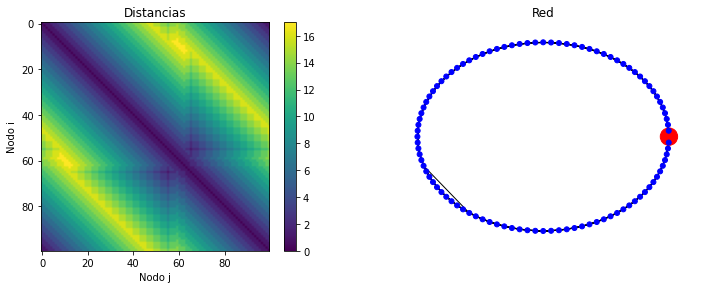

Diametro: 		 17.0 --> 17.0
Distancia media: 	 8.67 --> 8.2802
Clustering: 		 0.600000000000001 --> 0.5966190476190486


In [11]:
# Modificación de la red

cambio_enlace(G2)

MatD = np.zeros([N,N])
for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

        
        
h = .6

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: \t\t', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: \t', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: \t\t', nx.average_clustering(G), '-->', nx.average_clustering(G2))

Para automatizarlo $n$ veces:

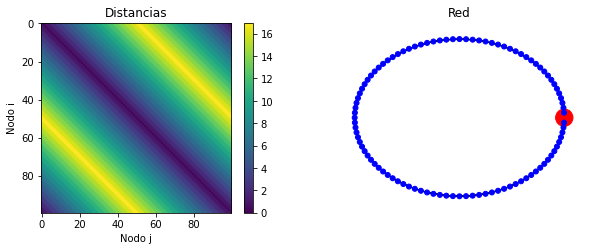

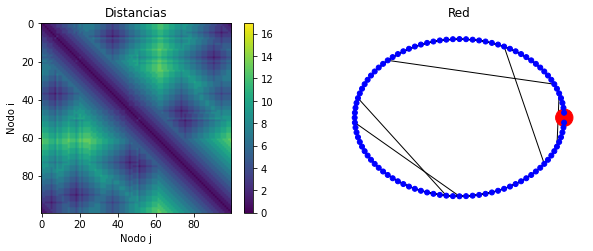

Diametro:  17.0 --> 13.0
Distancia media:  8.67 --> 5.773
Clustering:  0.600000000000001 --> 0.5734285714285723


In [12]:
G2 = G.copy()

veces = 5

for k in range(veces):
    cambio_enlace(G2)


MatD = np.zeros([N,N])

for i in range(N):
    for j in range(N):
        MatD[i,j] = nx.shortest_path_length(G2, i, j)

        
        
h = .5

fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD0, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)

ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')
plt.show()


fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize = (20*h,7*h)) 
nx.draw_circular(G2, node_size = tamanos, node_color = colores, ax = ax2)


#fig, ax = plt.subplots(figsize = (10*h,7*h)) 
pos = ax1.imshow(MatD, vmin=dmin, vmax=dmax)
fig.colorbar(pos, ax=ax1)
ax1.set_title('Distancias')
ax1.set_xlabel('Nodo j')
ax1.set_ylabel('Nodo i')

ax2.set_title('Red')

plt.show()
print('Diametro: ', np.max(MatD0), '-->',np.max(MatD))
print('Distancia media: ', np.mean(MatD0), '-->', np.mean(MatD))
print('Clustering: ', nx.average_clustering(G), '-->', nx.average_clustering(G2))

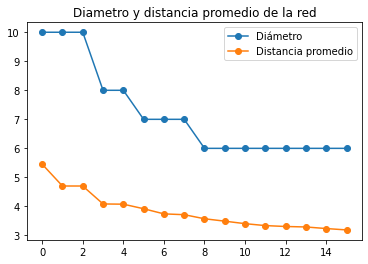

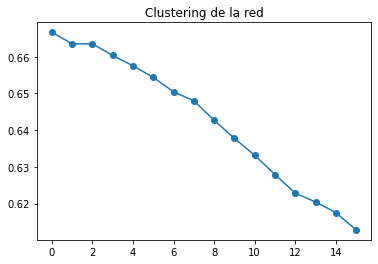

In [13]:
#Ejercicio

#Genera la red anillo
#### INICIO EJERCICIO

N = 100
l = 5

G = Anillo(N,l)

G2 = G.copy()
#### FINAL  EJERCICIO      
# Generar una lista para cada variable. El primer elemento de cada lista es el valor inicial del diámetro
# la distancia promedio y el coeficiente de clustering promedio de la red.

Diam = [nx.diameter(G2)]
Dist = [nx.average_shortest_path_length(G2)]
Clus = [nx.average_clustering(G2)]



# Aplica la fucnión cambio_enlace varias veces (define cuantas veces), 
# y cada vez que lo apliques, calcula los nuevos valores 
# y agrégalos a la lista usando lista.append(valor). Para ello haz un bucle usando k

k = 15  #numero de veces que se aplicará la función

for i in range(k):
    ### INICIO EJERCICIO
    # aplica la funcion
    cambio_enlace(G2)
    # agrega los valores a las correspondientes listas
    Diam.append(nx.diameter(G2))
    Dist.append(nx.average_shortest_path_length(G2))
    Clus.append(nx.average_clustering(G2))    
    ### FINAL EJERCICIO
    

    # Las siguientes líneas hacen una gráfica simple de las listas de valores generados. 
# El diámetro y la distancia promedio se grafican juntas, el clustering aparte.
plt.plot(Diam,'o-',label="Diámetro")
plt.plot(Dist,"o-",label="Distancia promedio")
plt.title("Diametro y distancia promedio de la red")
plt.legend()
plt.show()


plt.plot(Clus,'o-')
plt.title("Clustering de la red")
plt.show()

In [14]:
# Eliminando fluctuaciones que se oservaron en la práctica pasada.

# Se generan las listas donde se introducirán las listas de los valores de cada corrida.
N = 100
l = 3

G = Anillo(N,l)


DIAM = []
DIST = []
CLUS = []

corridas = 15

for l in range(corridas):
    #### INICIO EJERCICIO Haz lo mismo que hiciste en la casilla anterior, 
    #    pero ahora dentro de este bucle para que se haga varias veces
    G2 = G.copy()

    #crea las listas de cada variable aplicada a G2
    Diam = [nx.diameter(G2)]
    Dist = [nx.average_shortest_path_length(G2)]
    Clus = [nx.average_clustering(G2)]
    
    k = 20 # numero de cambio de enlaces
    for i in range(k):
        #aplica la función cambio de enlace y agrega las nuevas propiedades de la red a las listas
        cambio_enlace(G2)
        
        Diam.append(nx.diameter(G2))
        Dist.append(nx.average_shortest_path_length(G2))
        Clus.append(nx.average_clustering(G2))
        
                


    #### FINAL EJERCICIO
    
    #las siguientes lineas agregan la información de cada corrida a una lista
    DIAM.append(Diam)
    DIST.append(Dist)
    CLUS.append(Clus)

In [15]:
Y1 = np.mean(np.array(DIAM), axis = 0)
Y2 = np.mean(np.array(DIST), axis = 0)
Y3 = np.mean(np.array(CLUS), axis = 0)

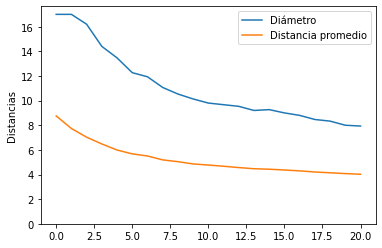

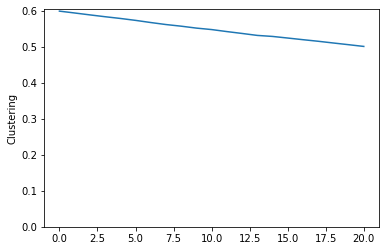

In [16]:
plt.plot(Y1,label="Diámetro")
plt.plot(Y2,label="Distancia promedio")
plt.ylim([0,None])
plt.ylabel('Distancias')
plt.legend()
plt.show()

plt.plot(Y3)
plt.ylim([0,None])
plt.ylabel('Clustering')
plt.show()

Hasta ahora se ha generado la intuición necesaria para la propuesta de Watts Strogatz, vamos a avanzar con la siguiente función que cambia enlaces con base en una probabilidad.

In [17]:
def re_enlazar(G, p):
    nodos = set(G)

    for enlace in G.edges():
        if np.random.rand() < p:
            u, v = enlace
            eleccion = nodos -{u} - set(G[u])
            nuevo_v = np.random.choice( list(eleccion) )
            G.remove_edge(u,v)
            G.add_edge(u, nuevo_v)

Número de enlaces:  300
Esta conectada?  True


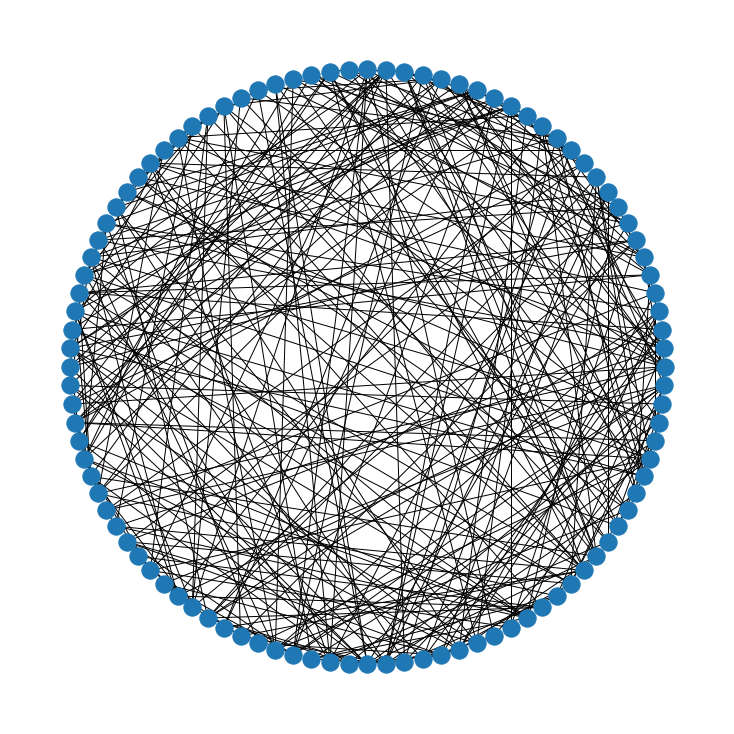

In [18]:
N = 100
l = 3

G = Anillo(N, l)

re_enlazar(G, 1)
print("Número de enlaces: ",len(G.edges))
print("Esta conectada? ",nx.is_connected(G))
plt.figure(figsize = [10,10])
nx.draw_circular(G)

Y con todo esto, por fin procedemos al experimento de Watts Strogatz

## Experimento de Watts-Strogatz

In [42]:
from tqdm import tqdm

In [45]:
N = 1000
l = 5
E = 20

G = Anillo(N,l)
D0 = nx.average_shortest_path_length(G)
C0 = nx.average_clustering(G)

dominio = np.logspace(-4,0, 20)

Dist = []
Clus = []
for p in tqdm(dominio):
    D = []
    C = []

    while len(D) < E:
        G = Anillo(N,l)
        re_enlazar(G,p)

        if not nx.is_connected(G): continue
        D.append(nx.average_shortest_path_length(G))
        C.append(nx.average_clustering(G))
    Dist.append(np.mean(D)/D0)
    Clus.append(np.mean(C)/C0)

100%|███████████████████████████████████████████| 20/20 [10:46<00:00, 32.31s/it]


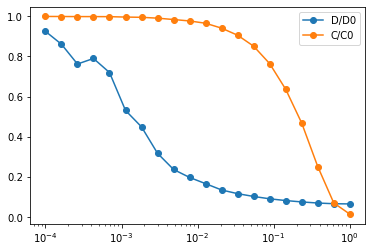

In [46]:
plt.plot(dominio,Dist,'o-',label="D/D0")
plt.plot(dominio,Clus,'o-',label="C/C0")
plt.xscale('log')
plt.legend()

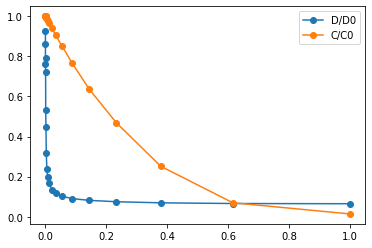

In [49]:
plt.plot(dominio,Dist,'o-',label="D/D0")
plt.plot(dominio,Clus,'o-',label="C/C0")
#plt.xscale('log')
plt.legend()

 # Clase del 2 de noviembre
 
 Este día fue feriado por el día de muertos, sin embargo, si tuvimos actividades relacionadas con la ley de potencias en redes: característica universal de las redes reales. No esta de más mencionar que fue el descubrimiento de Albert y Barabasi que posteriormente llevó al modelo de Barabasi-Albert.


In [8]:
import powerlaw
from scipy.stats import poisson

## Distribución de grado

In [3]:
! python rec-amazon.py  

Número de nodos: 2146057,	 Número de enlaces: 5743146
Esta conectada  True


In [4]:
Degree = np.loadtxt('degree.txt')

In [5]:
len(Degree)

2146057

## Visualización

In [11]:
K = Degree.max()
y0, x0 = np.histogram(Degree,
                     bins = range(int(K) + 2),
                     density = True)

In [12]:
N = len(Degree)
L = 5743146
k = 2*L/N

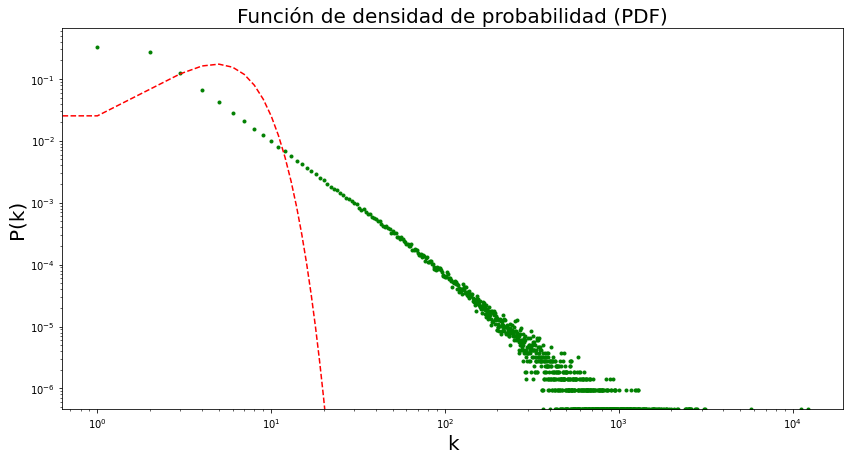

In [35]:
plt.figure(figsize = [14,7])
plt.plot(x0[:-1],y0,'g.')
plt.plot(x0[:-1], poisson.pmf(x0[:-1], k), 'r--', label = 'poisson')
plt.title("Función de densidad de probabilidad (PDF)",size=20)
plt.xlabel("k",size=20)
plt.ylabel("P(k)",size=20)
plt.xscale('log')
plt.yscale('log')

plt.ylim([y0[y0>0].min(),2*y0.max()])

plt.savefig("PDF")

In [16]:
log_bins = np.logspace(0,np.log10(K+2),20)

y, x = np.histogram(Degree,
                    bins = log_bins,
                    density = True)

### PDF función de densidad de probabilidad

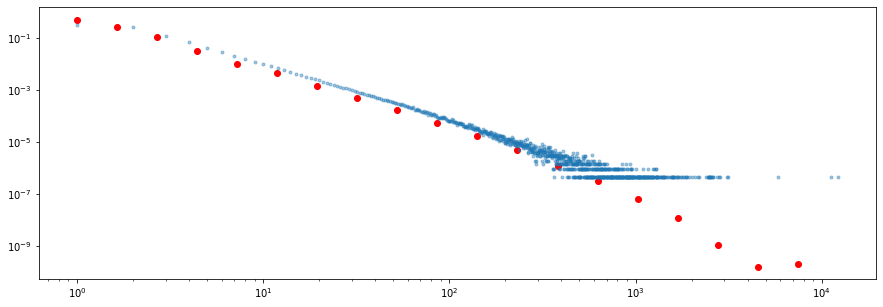

In [17]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x0[:-1],y0,'.',alpha = 0.4)
plt.xscale('log')
plt.yscale('log')

### Función de distribución complementaria acumulada (CCDF)

In [18]:
ccdf = np.array([y0[i:].sum() for i in range(len(y0))])

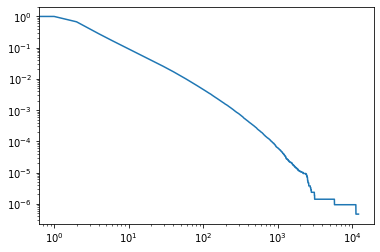

In [19]:
plt.plot(x0[:-1],ccdf)
plt.xscale('log')
plt.yscale('log')

## Ahora a calcular la potencia $\alpha$

In [21]:
xmin = 1

D = Degree[Degree >= xmin]
α = 1 + len(D)*(np.log(D/xmin).sum())**(-1.)

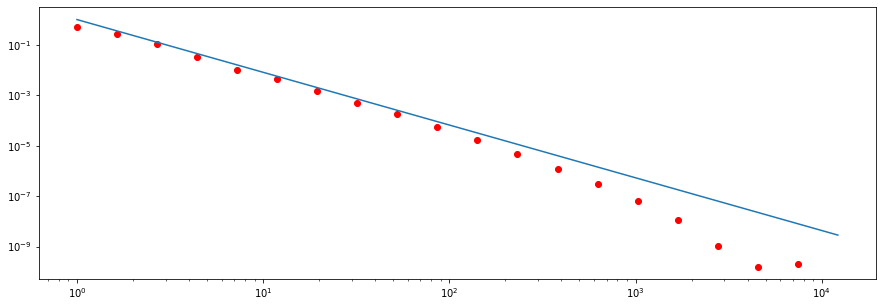

In [22]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x,x**(-α))
plt.xscale('log')
plt.yscale('log')

Comportamiento frente a xmin

In [26]:
dom = np.logspace(0,np.log10(K+2))

αs = []

for kmin in dom:
    D = Degree[Degree >= kmin]
    α = 1 + len(D)*(np.log(D/xmin).sum())**(-1.)
    
    αs.append(α)

/tmp/ipykernel_54811/2873185751.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  α = 1 + len(D)*(np.log(D/xmin).sum())**(-1.)
/tmp/ipykernel_54811/2873185751.py:7: RuntimeWarning: invalid value encountered in double_scalars
  α = 1 + len(D)*(np.log(D/xmin).sum())**(-1.)


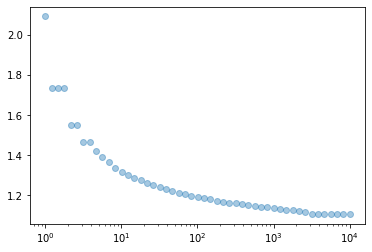

In [27]:
plt.plot(dom,αs, 'o', alpha = 0.4)
plt.xscale('log')

In [29]:
fit = powerlaw.Fit(Degree)

Calculating best minimal value for power law fit
/home/rogve98/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


In [38]:
fit.alpha
#fit.xmin

2.696237705372992

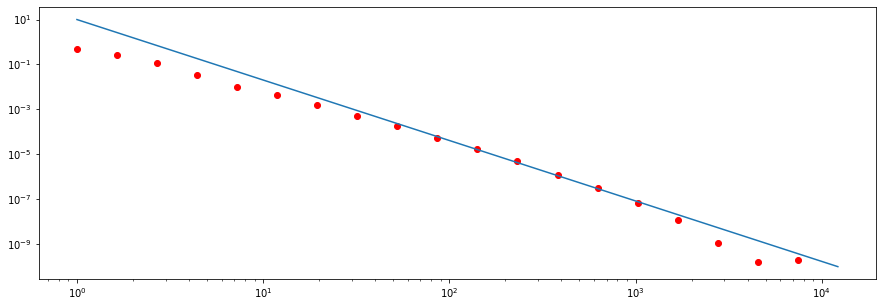

In [31]:
plt.figure(figsize = [15,5])
plt.plot(x[:-1],y,'ro')
plt.plot(x,10*x**(-fit.alpha))
plt.xscale('log')
plt.yscale('log')

## Red de interacciones de stackoverflow

In [ ]:
! python redSO.py  

In [3]:
Degree = np.loadtxt('gradosSO.txt')

In [4]:
len(Degree)

2601977

In [12]:
k = 2*24637649/2601977

In [13]:
K = Degree.max()

y0, x0 = np.histogram(Degree,
                     bins = range(int(K) + 2),
                     density = True)

log_bins = np.logspace(0,np.log10(K+2),20)

y, x = np.histogram(Degree,
                    bins = log_bins,
                    density = True)

In [14]:
fit = powerlaw.Fit(Degree)
fit.alpha

Values less than or equal to 0 in data. Throwing out 0 or negative values
Calculating best minimal value for power law fit
/home/rogve98/anaconda3/lib/python3.9/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in true_divide
  (CDF_diff**2) /


2.726472802937014

In [15]:
K

50322.0

In [16]:
dom = np.logspace(0,np.log10(K+2))

αs = []

for kmin in dom:
    D = Degree[Degree >= kmin]
    α = 1 + len(D)*(np.log(D/kmin).sum())**(-1.)
    
    αs.append(α)

/tmp/ipykernel_48020/3904845953.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  α = 1 + len(D)*(np.log(D/kmin).sum())**(-1.)
/tmp/ipykernel_48020/3904845953.py:7: RuntimeWarning: invalid value encountered in double_scalars
  α = 1 + len(D)*(np.log(D/kmin).sum())**(-1.)


In [17]:
αs[10]

1.7298633289531293

/tmp/ipykernel_48020/70426468.py:5: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0,1000])


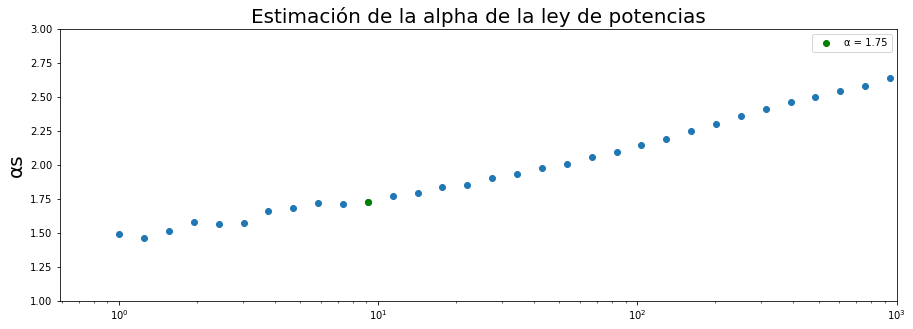

In [18]:
plt.figure(figsize = [15,5])
plt.plot(dom,αs, 'o')
plt.plot(dom[10],αs[10], 'go',label="α = 1.75")
plt.xscale('log')
plt.xlim([0,1000])
plt.ylim([1,3])

plt.ylabel("αs",size=20)
plt.title("Estimación de la alpha de la ley de potencias",size=20)

plt.legend()

plt.savefig("alphas")

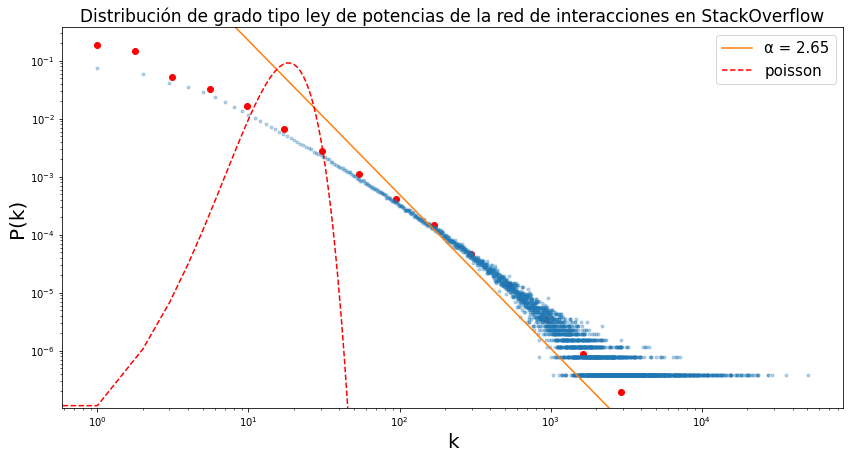

In [20]:
plt.figure(figsize = [14,7])
plt.plot(x[:-1],y,'ro')
plt.plot(x0[:-1],y0,'.',alpha = 0.3)
#plt.plot(x,x**(-αs[10]),label="α = 1.75")
plt.plot(x,100*x**(-2.6533755985641174),label="α = 2.65")
plt.plot(x0[:-1], poisson.pmf(x0[:-1], k), 'r--', label = 'poisson')
plt.xscale('log')
plt.yscale('log')

plt.ylabel("P(k)",size=20)
plt.xlabel("k",size=20)
plt.title("Distribución de grado tipo ley de potencias de la red de interacciones en StackOverflow",size=17)
plt.legend(prop={'size': 15})

plt.ylim([1000*y[y>0].min(),2*y.max()])

plt.savefig("ley de potencia SO")

# Clase 9 de noviembre 2022

Vamos a reproducir el modelo de barabasi albert

In [29]:
G = nx.Graph()
n0 = 3
m = 6

for i in range(n0):
    G.add_node(i)
    
for i in range(1,n0):
    G.add_edge(i,i-1)

In [20]:
for i in range(1):
    p_d = np.array([G.degree[nodo] for nodo in G])
    p_d = p_d/p_d.sum()
    n = np.random.choice(list(G), 
                         #size = m, 
                         #replace = False,
                         p = p_d)
    G.add_edge(len(G), n)

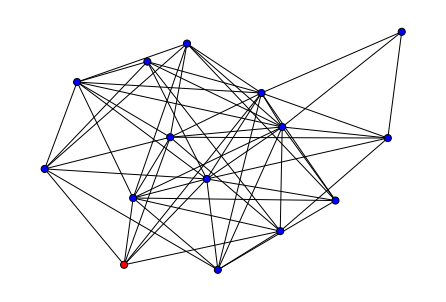

In [35]:
colors = ['b' for nodo in G]
colors[-1] = 'r'
nx.draw_kamada_kawai(G,node_color=colors,node_size=50,edgecolors = 'k')

In [4]:
dict(G.degree)

{0: 46,
 1: 115,
 2: 92,
 3: 6,
 4: 13,
 5: 83,
 6: 7,
 7: 48,
 8: 45,
 9: 37,
 10: 28,
 11: 8,
 12: 17,
 13: 26,
 14: 31,
 15: 46,
 16: 6,
 17: 64,
 18: 1,
 19: 10,
 20: 8,
 21: 3,
 22: 6,
 23: 10,
 24: 4,
 25: 5,
 26: 7,
 27: 18,
 28: 3,
 29: 12,
 30: 14,
 31: 6,
 32: 5,
 33: 15,
 34: 40,
 35: 2,
 36: 26,
 37: 21,
 38: 6,
 39: 15,
 40: 6,
 41: 2,
 42: 5,
 43: 4,
 44: 47,
 45: 15,
 46: 6,
 47: 10,
 48: 12,
 49: 13,
 50: 1,
 51: 15,
 52: 3,
 53: 4,
 54: 29,
 55: 1,
 56: 16,
 57: 1,
 58: 1,
 59: 10,
 60: 3,
 61: 26,
 62: 8,
 63: 6,
 64: 2,
 65: 4,
 66: 24,
 67: 5,
 68: 4,
 69: 1,
 70: 1,
 71: 6,
 72: 10,
 73: 4,
 74: 1,
 75: 8,
 76: 9,
 77: 12,
 78: 2,
 79: 20,
 80: 7,
 81: 10,
 82: 8,
 83: 1,
 84: 1,
 85: 8,
 86: 2,
 87: 17,
 88: 16,
 89: 8,
 90: 7,
 91: 2,
 92: 1,
 93: 9,
 94: 12,
 95: 2,
 96: 4,
 97: 1,
 98: 24,
 99: 2,
 100: 4,
 101: 3,
 102: 1,
 103: 1,
 104: 4,
 105: 5,
 106: 4,
 107: 4,
 108: 1,
 109: 5,
 110: 4,
 111: 7,
 112: 8,
 113: 28,
 114: 1,
 115: 9,
 116: 13,
 117: 15,
 

In [5]:
grado = np.array([G.degree[nodo] for nodo in G])
y, x = np.histogram(grado,bins = range(grado.max()+2))

In [6]:
x = x[1:]


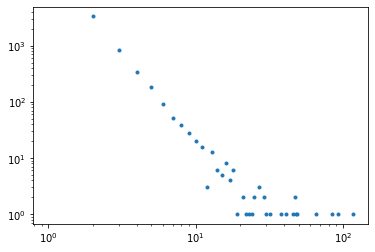

In [7]:
plt.plot(x,y,'.')
plt.xscale('log')
plt.yscale('log')

In [8]:
len(G)

5003

In [36]:
for i in range(1000):
    p_d = np.array([G.degree[nodo] for nodo in G])
    p_d = p_d/p_d.sum()
    
    nodos = np.random.choice(list(G),
                            size = m, #tamaño de numeros aleatorios
                            replace = False, #con remplazo, sin remplazo
                            p = p_d)
    nuevo_nodo = len(G)
    for n in nodos:
        G.add_edge(nuevo_nodo, n)
        
    grado = np.array([G.degree[nodo] for nodo in G])
    y, x = np.histogram(grado,bins = range(grado.max()+2))

In [37]:
x = x[1:]

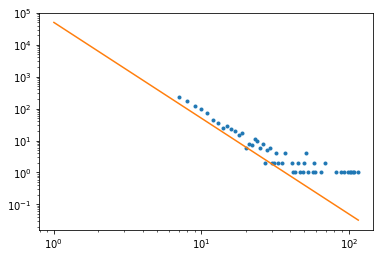

In [44]:
plt.plot(x,y,'.')
plt.plot(x,50000*x**(-3.))
plt.xscale('log')
plt.yscale('log')

Notemos que a pesar de que estamos enlazando dos un nodo a dos nodos en el proceso, se sigue cumpliendo la ley de potencias. Por último vamos a intentarlo para m=6 y ver que pasa.

# Clase 16 de noviembre. 

Vamos a ver el material de difusión en redes, vamos a ver los primeros indicios de redes ponderadas.

In [22]:
N = 10
G = nx.barabasi_albert_graph(N,1)

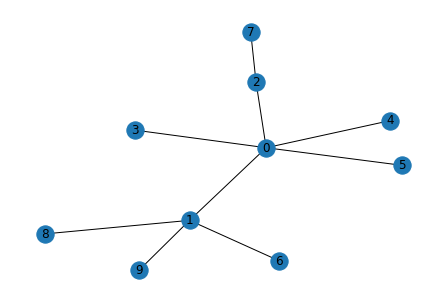

In [23]:
nx.draw(G, with_labels =  True)

In [24]:
A = nx.to_numpy_array(G)

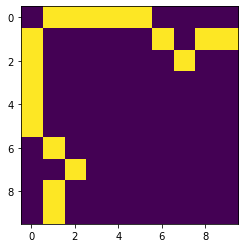

In [25]:
plt.imshow(A)

In [26]:
D = np.zeros([N,N])

In [27]:
for i in range(N):
    D[i,i] = G.degree(i)

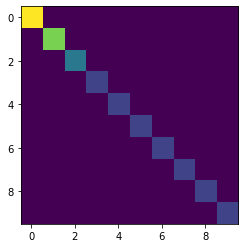

In [28]:
plt.imshow(D)

In [29]:
L = D - A

In [30]:
λ , v = np.linalg.eig(L)

In [31]:
#Los eigenvectores están dados por las columnas de la matriz de eigenvectores
λ[2]*v[:,2]

array([-0.44714515, -0.12403885, -1.93501085,  0.30714364,  0.30714364,
        0.30714364,  0.08520219,  1.32915738,  0.08520219,  0.08520219])

In [32]:
L.dot(v[:,2])

array([-0.44714515, -0.12403885, -1.93501085,  0.30714364,  0.30714364,
        0.30714364,  0.08520219,  1.32915738,  0.08520219,  0.08520219])

In [33]:
#Lo que esta en el paréntesis es una arreglo de booleanos. 
#Multiplicando por el vector de eigenvalores, devuelve los valores que cumplan la condición del paréntesis
l = (λ > 1e-8)*λ

In [34]:
l

array([ 6.35652985,  4.38267355,  2.45581771, -0.        ,  0.52831601,
        0.27666288,  1.        ,  1.        ,  1.        ,  1.        ])

In [35]:
v[:,5]

array([-0.12018667,  0.28338789, -0.3526026 , -0.16615582, -0.16615582,
       -0.16615582,  0.39177844, -0.48746648,  0.39177844,  0.39177844])

## Complemento 1

La siguiente celda resuelve un posible problema que tiene la función `np.linalg.eig()` para nuestros fines y es que puede ocurrir que el eigenvector correspondiente al eigenvalor $\lambda_0=0$, que como vimos en la parte te+orica es $(1,1,...,1)$ y tiene una interpretación física, sea sustituido por su inverso $(-1,-1,...,-1)$ que no tiene significado físico. Si es el caso, debemos cambiarlo y es lo que se hace a continuación.

In [37]:
for i, valor in enumerate(l):
    if valor != 0: continue
    else: 
        if v[0,i] < 0:
            v[:,i] = -v[:,i]

In [38]:
v.T[l==0]

array([[0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777,
        0.31622777, 0.31622777, 0.31622777, 0.31622777, 0.31622777]])

In [40]:
p_0 = np.zeros(N)

In [41]:
p_0[5] = 1

In [42]:
p_0

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

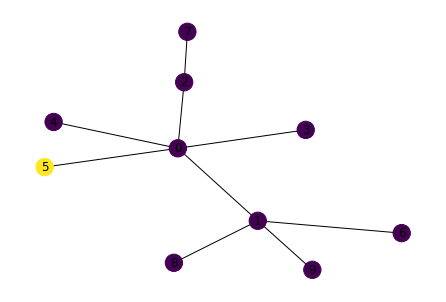

In [44]:
nx.draw(G,node_color=p_0, with_labels=True)

##  Ecuación 

$$
a_0\vec{v}_0+a_1+\vec{v}_1+\cdots+a_{N-1}\vec{v}_{N-1}=(\vec{v}_0|\vec{v}_1|...|\vec{v}_{N-1})\begin{pmatrix}
a_0\\
a_1\\
\vdots\\
a_{N-1}
\end{pmatrix}
$$

Por lo tanto, la inversa de la matriz $v$ (cuyas columnas son los eigenvectores) debe multiplicarse por la izquierda y no por la derecha  para despejarla. Por eso, la siguiente celda invierte los factores a como se ve en el video.

In [47]:
a = np.linalg.inv(v).dot(p_0)

In [48]:
def P(t):
    return np.array([a[i]*v[:,i]*np.exp(-l[i]*t) for i in range(N)]).T.sum(axis = 1)

In [49]:
P(0)

array([ 3.40803333e-17, -3.27074578e-18, -7.04788021e-18,  1.66533454e-16,
        3.46944695e-17,  1.00000000e+00,  2.77555756e-17,  8.98262896e-18,
        1.66533454e-16, -2.77555756e-17])

## Complemento 2

Las siguientes dos celdas muestran el comportamiento de la concentración de cada nodo en un intervalo de tiempo como se hace en el ejemplo resuelto del curso, pero para los nodos de la red arbitraria que se use en este notebook

In [52]:
S = np.array([P(j) for j in np.arange(0,10,0.05)])

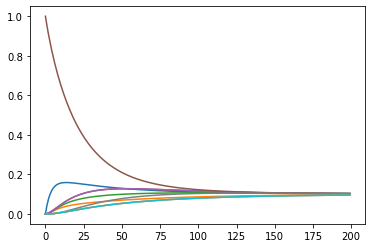

In [53]:
plt.plot(S)

## Complemento 3

A continuación se generan las imágenes correspondientes a la concentración del escalar en los nodos para distintos tiempos. Primero se debe generar el diccionario pos para que en todas las gráficas los nodos aparezcan en el mismo sitio y no se generen de forma aleatoria. Despúes se genera un bucle qur vaya variando el valor de $t$ y en cada caso coloree los nodos según alguna paleta de color y guarda la imagen ordenada según el índice $i$. Se recomieda correer esto en tu máquina para no tener que descargar demasiados archivos desde collab.

`s` es un parámetro que permite cambiar el tamaño de los nodos para cuando trabajamos con redes más grandes; cada iteración del bucle tiene dos `nx.draw()` el primero gener un fondo negro para cada nodo que aparecerá como borde de los nodos que es útil si se elige una paleta de color que tenga como extremo el color blanco. vmin y vmax son argumentos que depederán de tus condiciones iniciales.

In [54]:
pos = nx.kamada_kawai_layout(G)

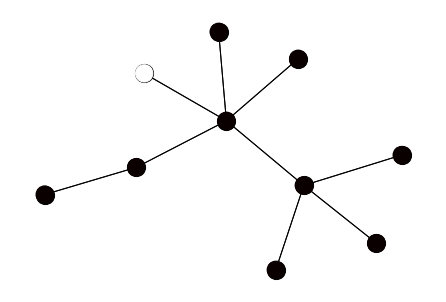

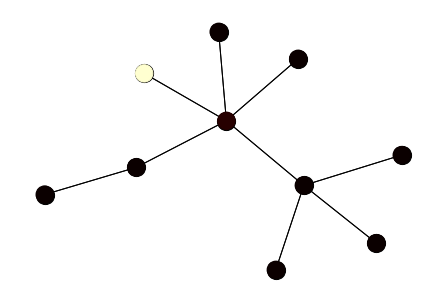

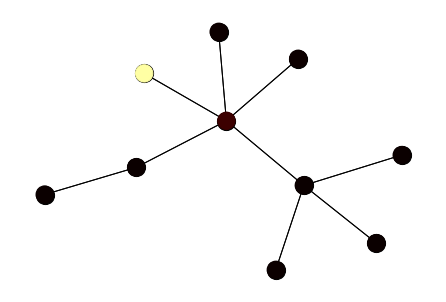

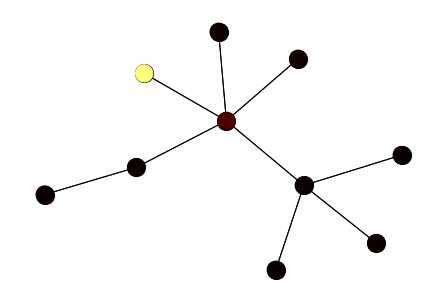

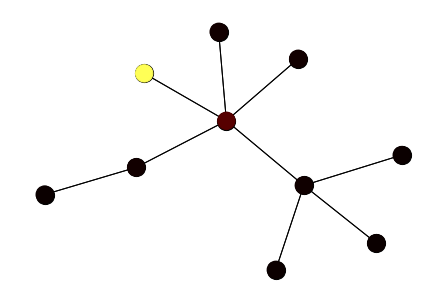

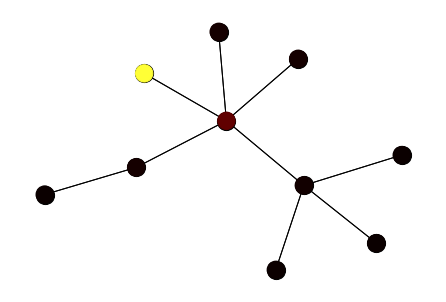

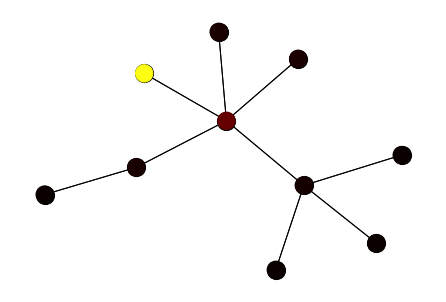

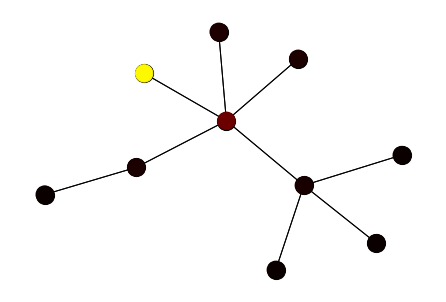

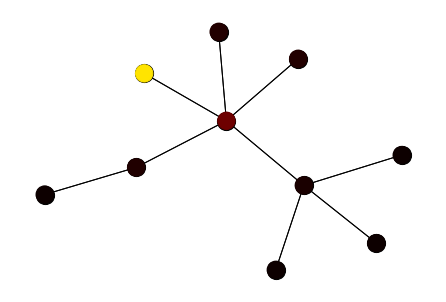

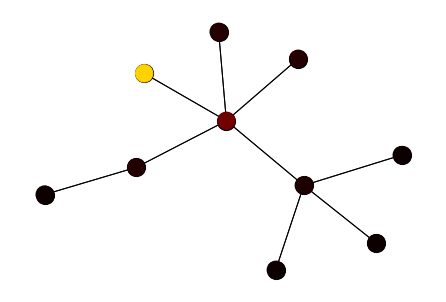

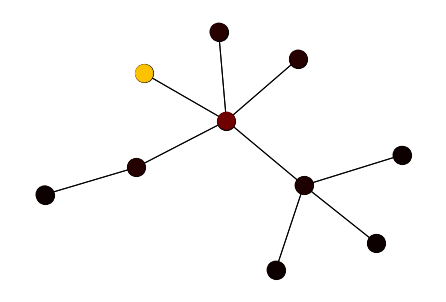

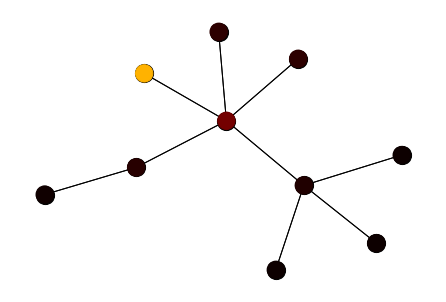

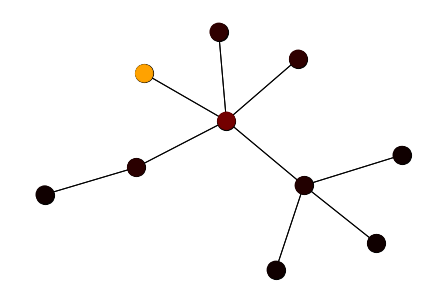

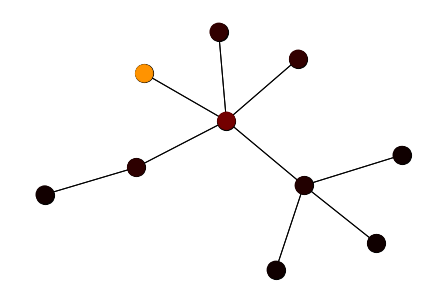

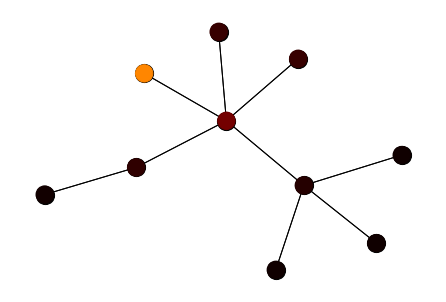

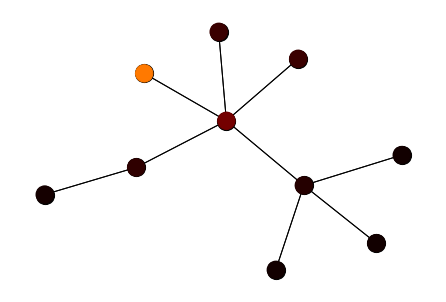

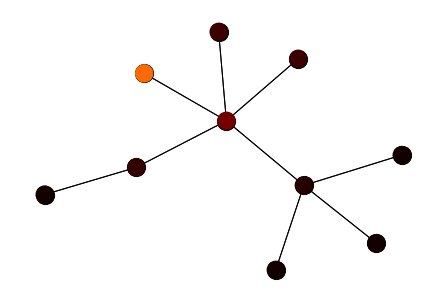

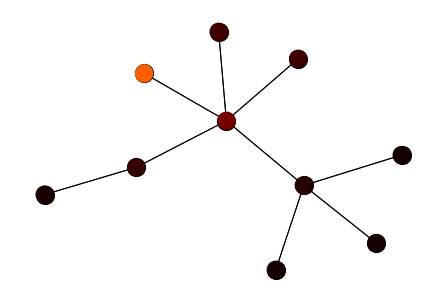

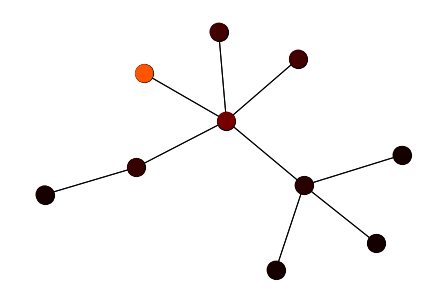

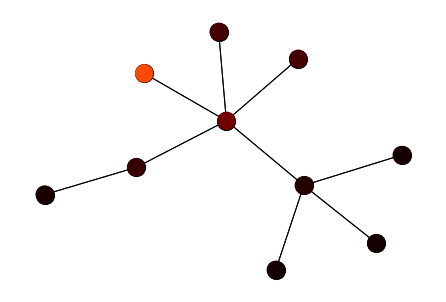

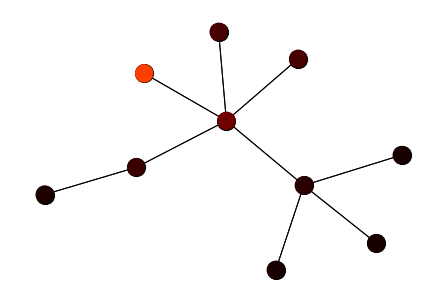

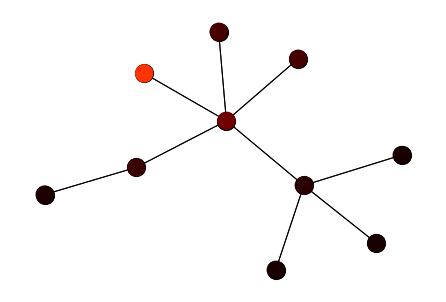

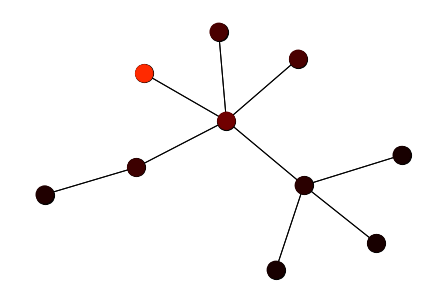

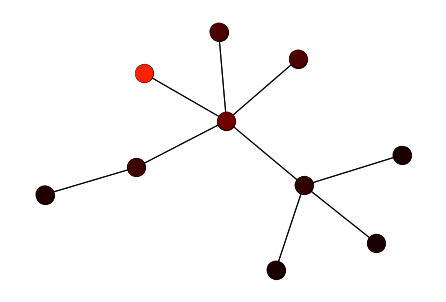

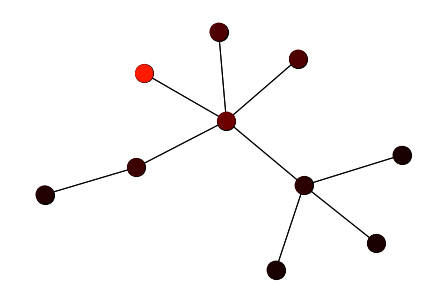

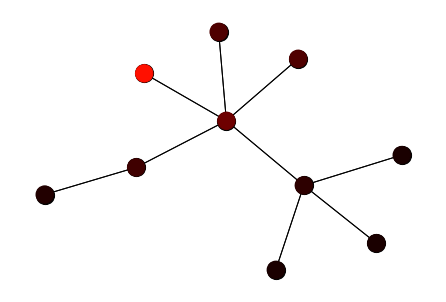

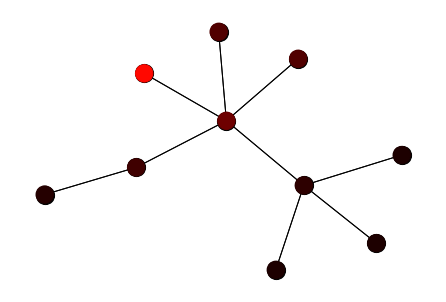

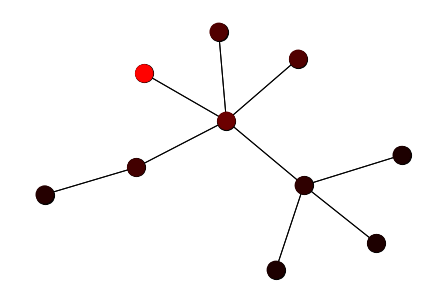

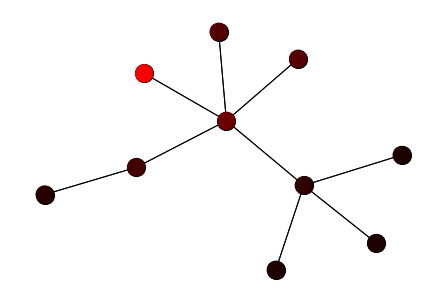

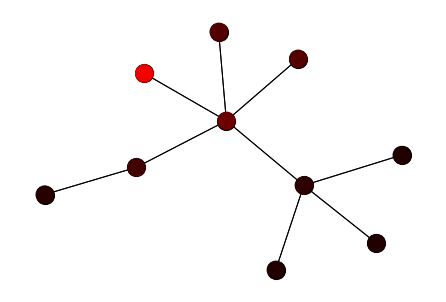

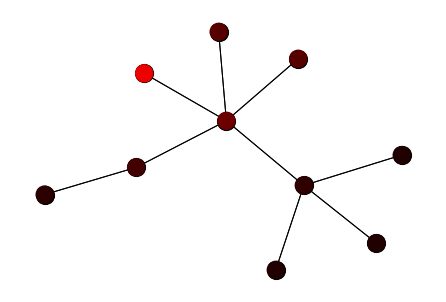

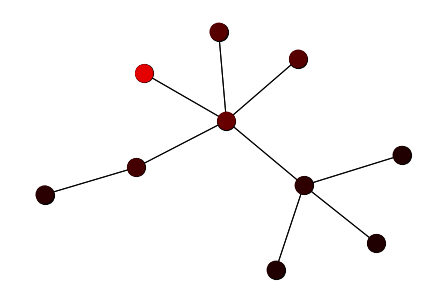

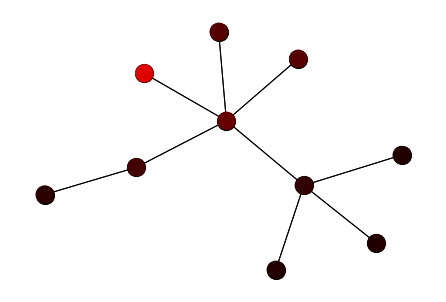

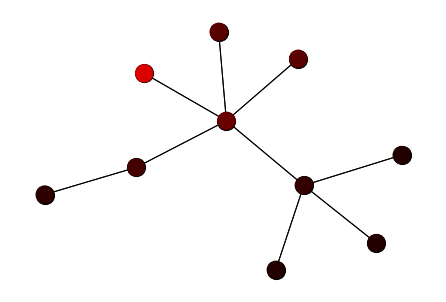

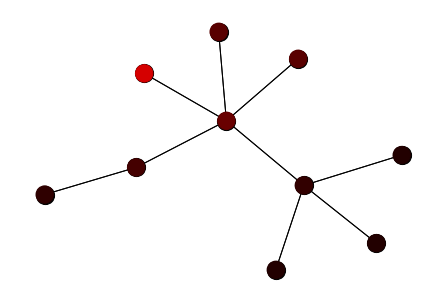

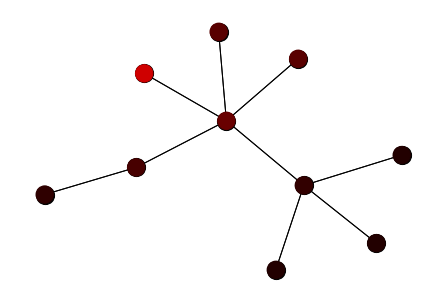

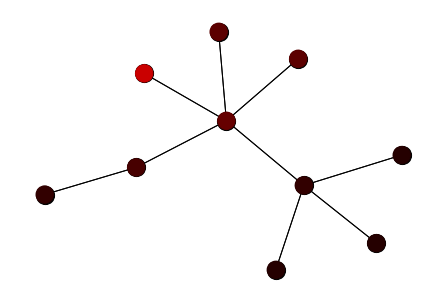

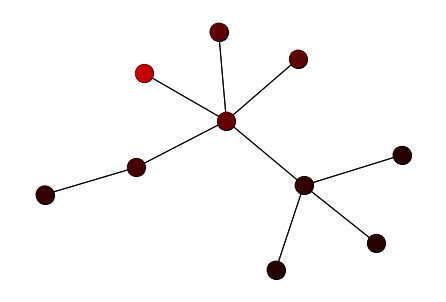

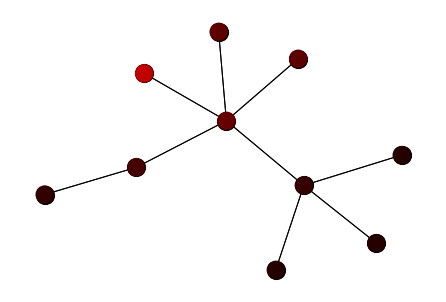

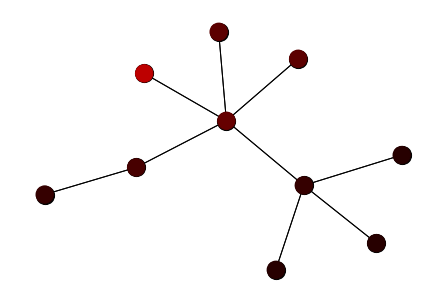

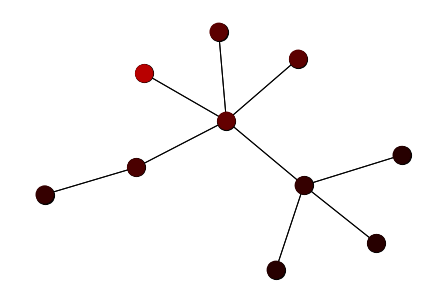

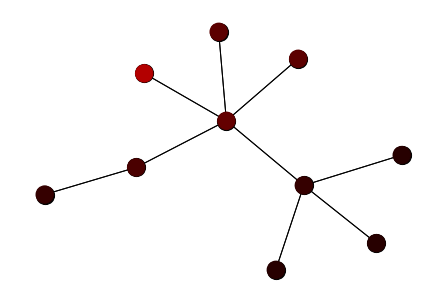

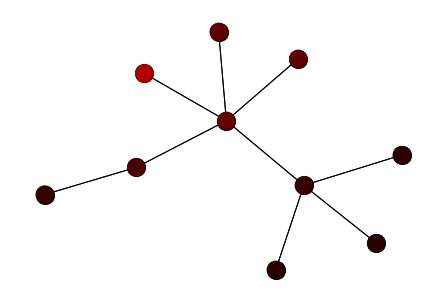

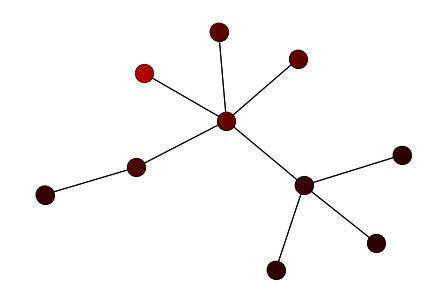

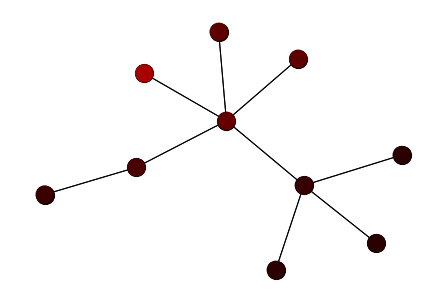

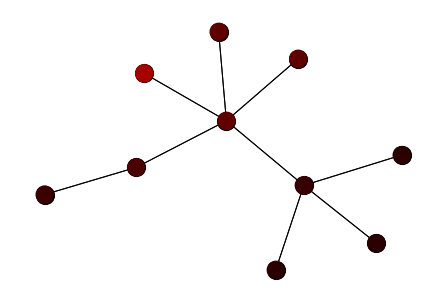

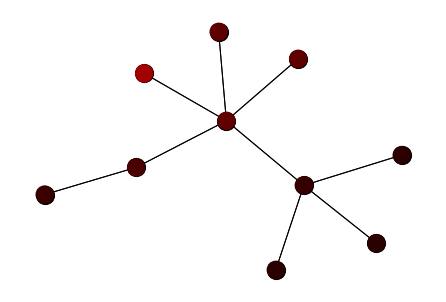

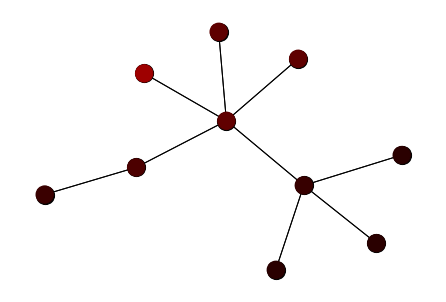

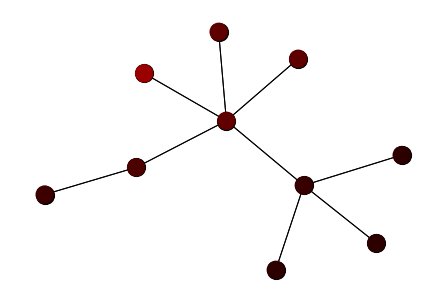

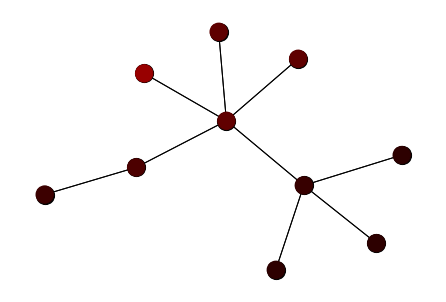

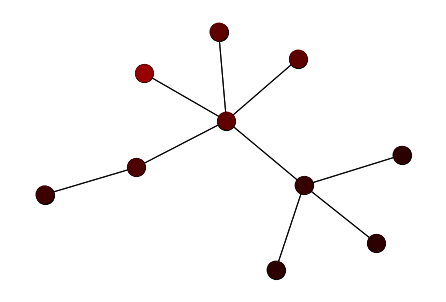

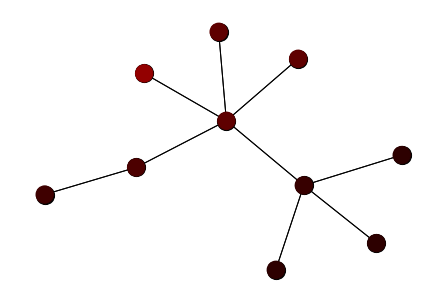

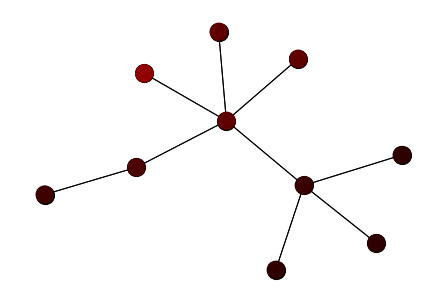

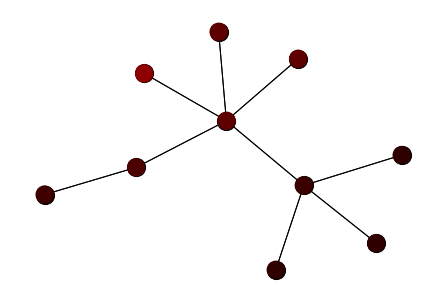

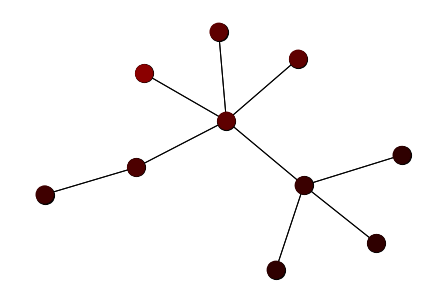

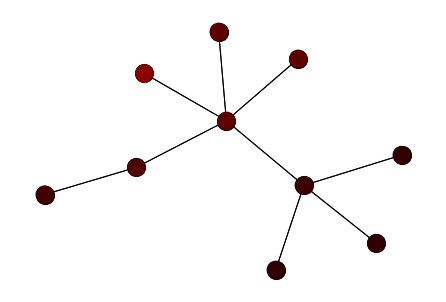

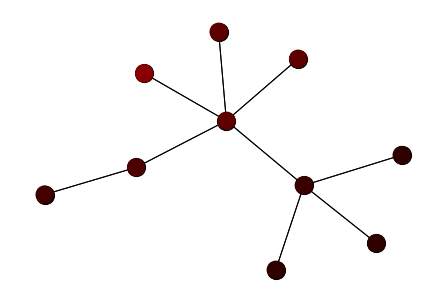

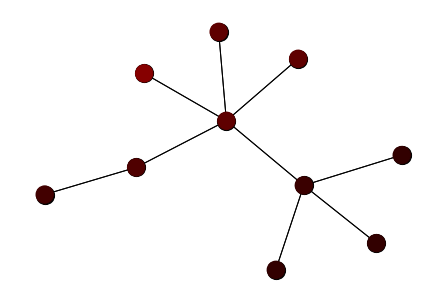

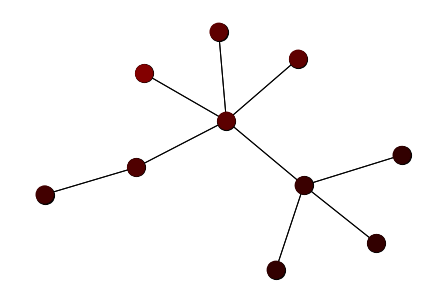

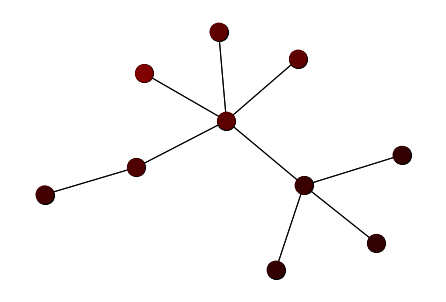

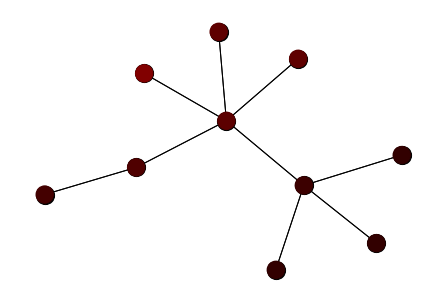

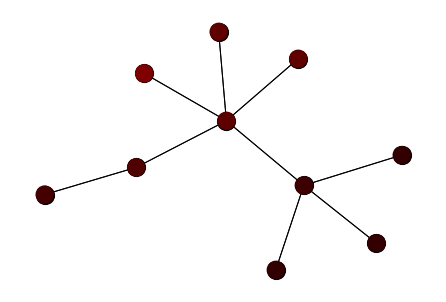

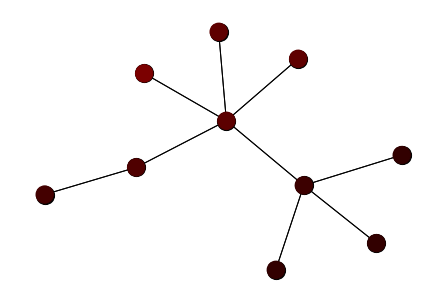

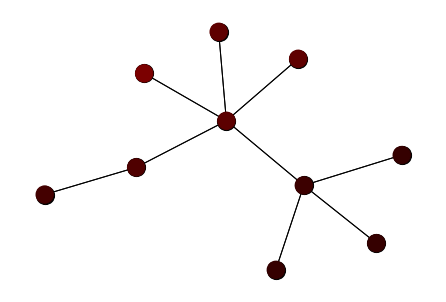

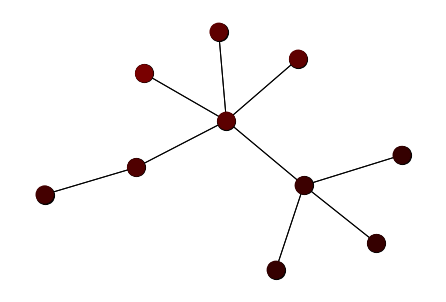

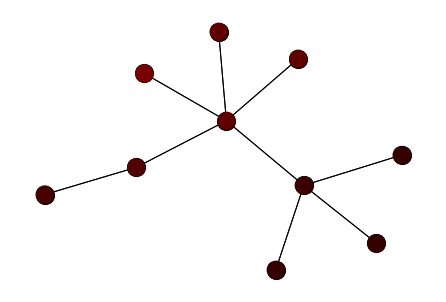

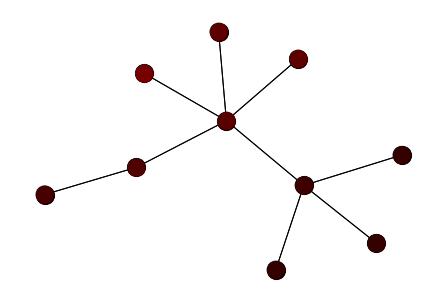

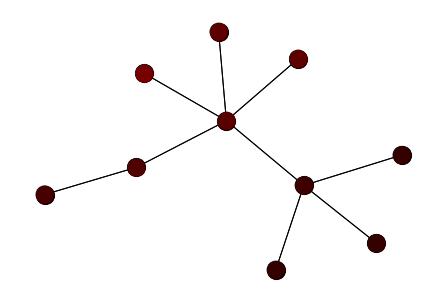

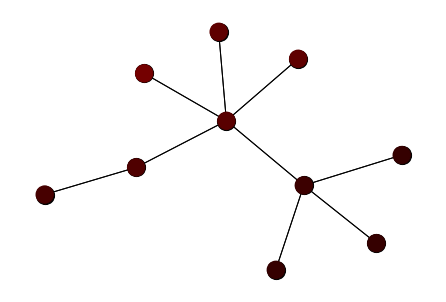

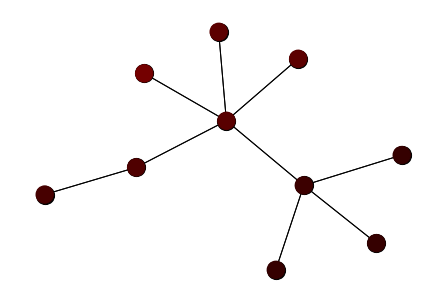

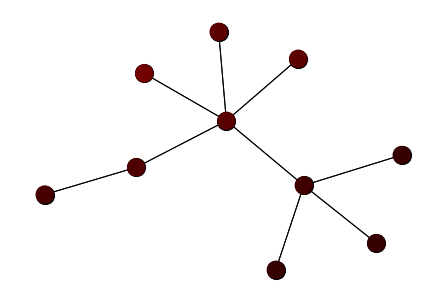

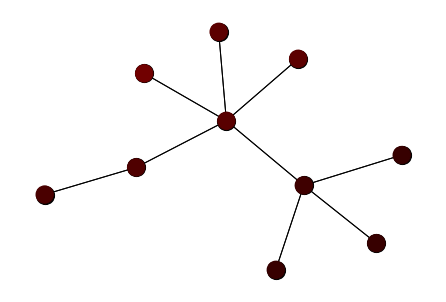

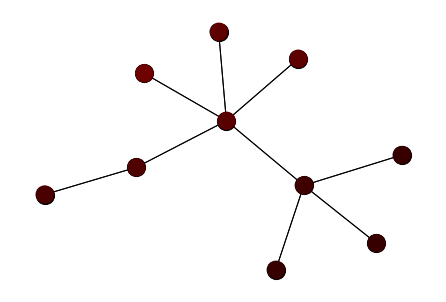

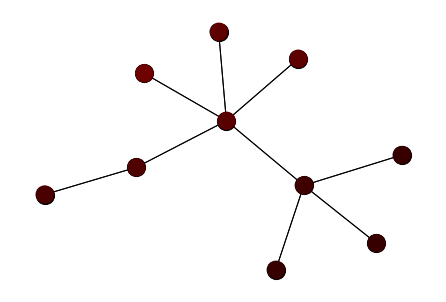

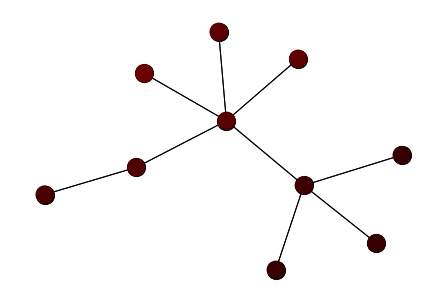

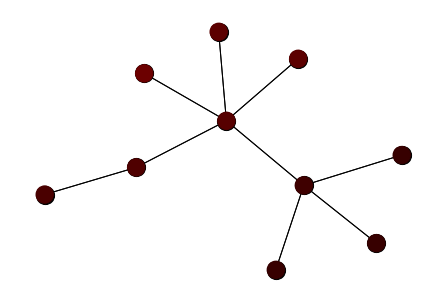

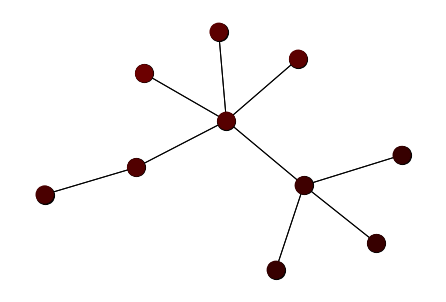

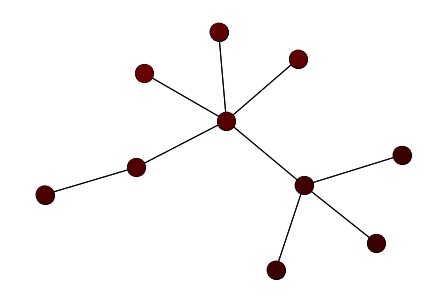

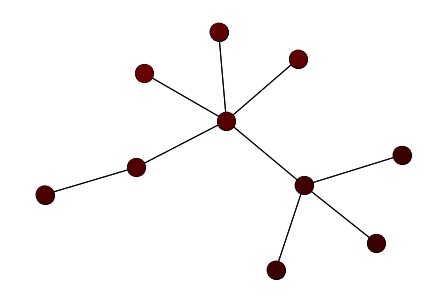

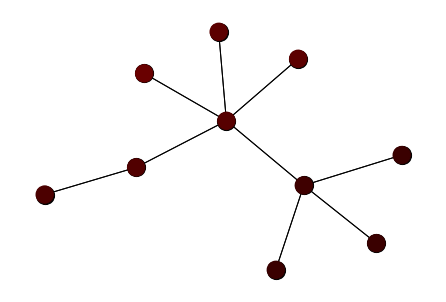

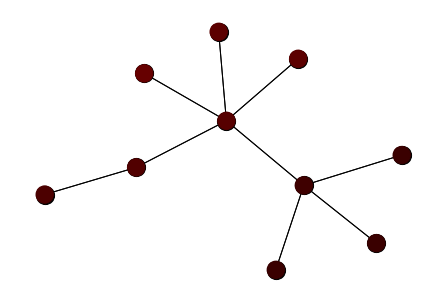

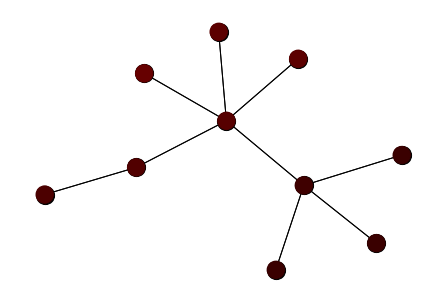

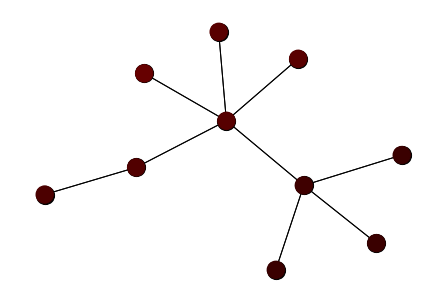

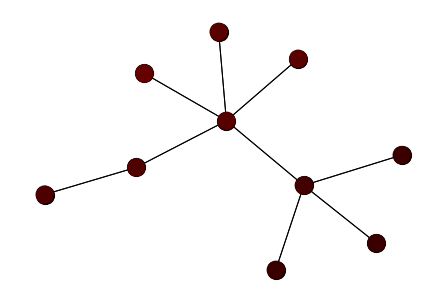

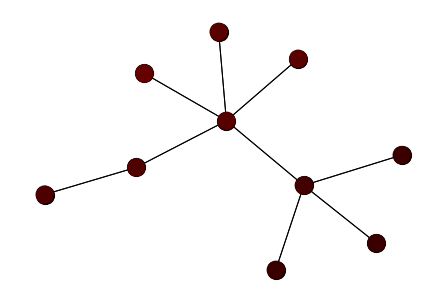

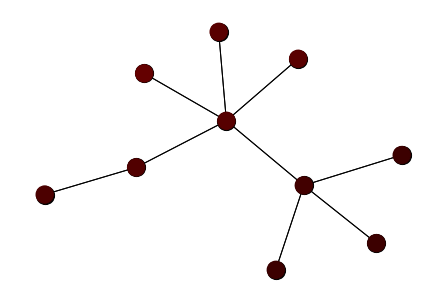

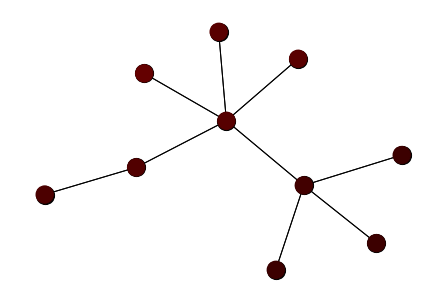

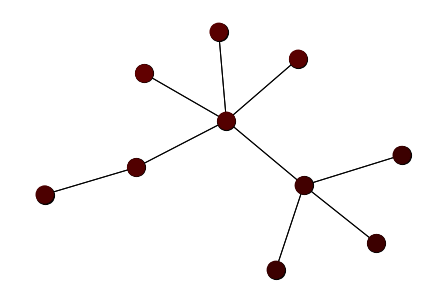

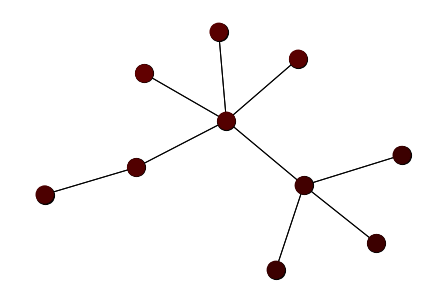

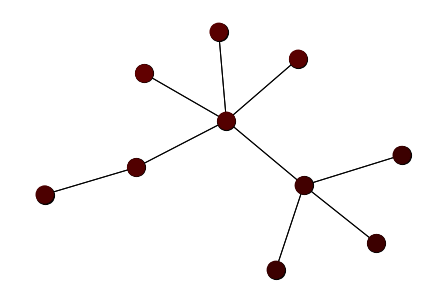

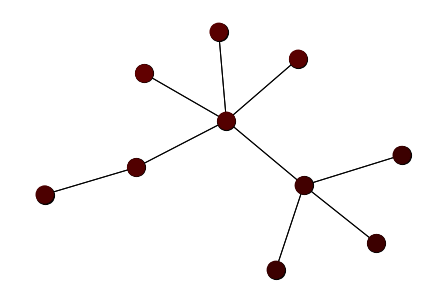

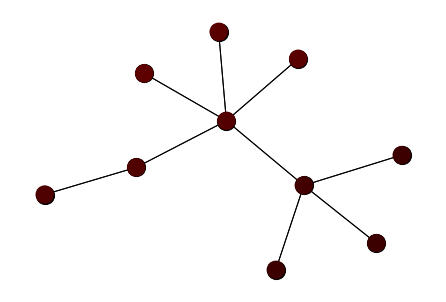

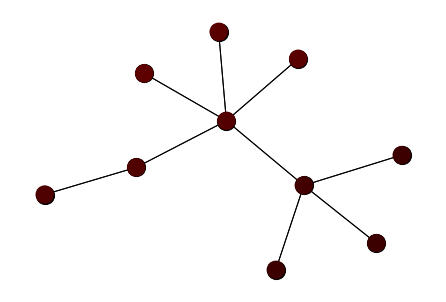

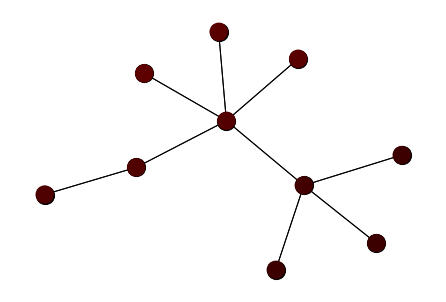

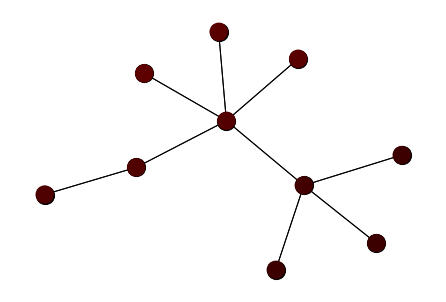

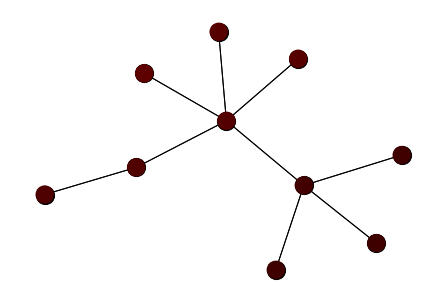

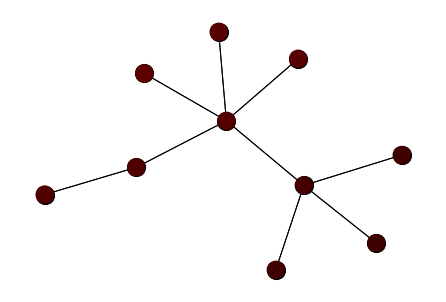

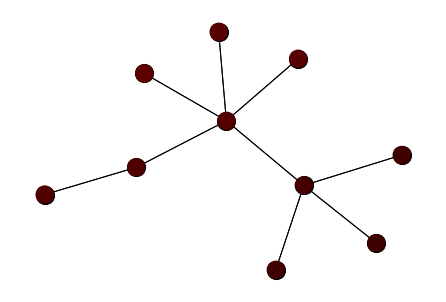

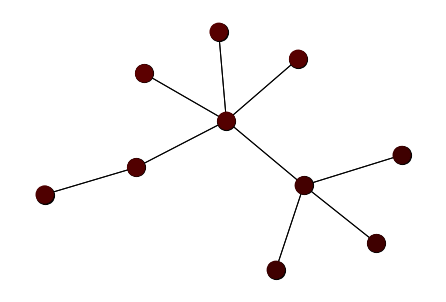

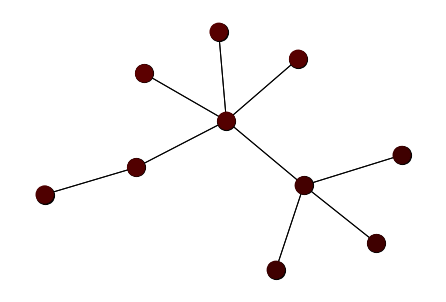

In [59]:
i = 0
s = 300
for t in np.arange(0,5,.05):
    nx.draw(G, pos = pos, node_color = 'k', node_size = 1.1*s)
    nx.draw(G, pos = pos, node_color=P(t), vmin = 0, vmax = 1, cmap = 'hot', node_size = s)
    #plt.savefig('%s.png'%str(i).zfill(3))
    plt.show()
    i +=1

La tarea pendiente y que no pude realizar en su momento es descubrir la forma en la que el nodo que tiene la cantidad inicial "1" siempre se mantenga así y que al final todos los nodos se tornen de color blanco. Me di cuenta que no hubo actividad para entregar evidencia en la plataforma asi que no es taaan urgente.

# Clase 23 de noviembre 2022.

La clase fue sobre transiciones de fase y pecolación en redes aleatorias. Es magnifico porque justo la semana pasada andaba exponiendo en la clase de Mekler las últimas tres secciones del capítulo de redes aleatorias del Barabasi; le metí interés y peso a la sección de transiciones de fase y por fortuna iré complementando más todo esto con lo que veré en la clase. (Al momento de escribir esto ya paso esta clase y la exposición de mekler, hoy es 28 de nov. 2022)

In [50]:
from tqdm import tqdm

100%|█████████████████████████████████████████████| 5/5 [00:27<00:00,  5.55s/it]


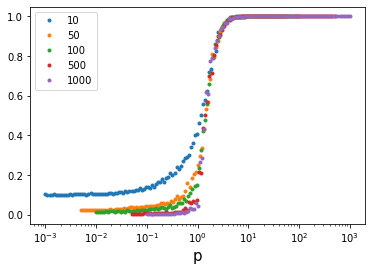

In [54]:
#N = 200

for N in tqdm([10,50,100,500,1000]):
    dominio = np.logspace(-4,0,100)

    #G = nx.erdos_renyi_graph(N,p)
    #nx.draw(G, with_labels = True)
    """por suerte esto ya lo hice en mi expo de Mekler. Usando Julia"""
    corridas = int(1000/N)
    Nmax = np.zeros(len(dominio))
    for i in range(corridas):
        Nmax += np.array([len(max(list(nx.connected_components(nx.erdos_renyi_graph(N,p))), key = len))/N for p in dominio])
    
    Nmax = Nmax/corridas
    plt.plot(dominio*N,Nmax, '.', label= N)
plt.xlabel('p',size = 15)
plt.xscale('log')
plt.legend()

Increible jajaja este código ha superado lo que yo hice en julia, pero tiene sentido porque el código que generé lo hice en 5min para una red de 100 y no ma xdd me tardó 10 minutos en compilar. O sea, nada optimizado mi código xdxd

##  Actividad: Percolación en redes

¿Cuántos enrutadores deben fallar para que la Internet se convierta en un conjunto de computadoras incapaces de comunicarse entre ellas? ¿Cuántas especies deben extinguirse para que un ecosistema pierda sus funciones ecológicas? ¿Cuántos individuos deben de estar vacunados para evitar la propagación de una enfermedad? ¿Cómo diseñar una red que sea robusta ante fallas o ataques de sus nodos?

En redes la percolación es el proceso en el que se quita una fracción de nodos junto con sus enlaces. Este proceso se puede utilizar para estudiar una gran diversidad de fenómenos reales, como los descritos por las preguntas anteriores.

Como se muestra en la siguiente figura, quitar un solo nodo de forma aleatoria tiene un efecto limitado sobre la estructura de la red. Sin embargo, si se quitan varios nodos la red se puede romper en múltiples componentes.

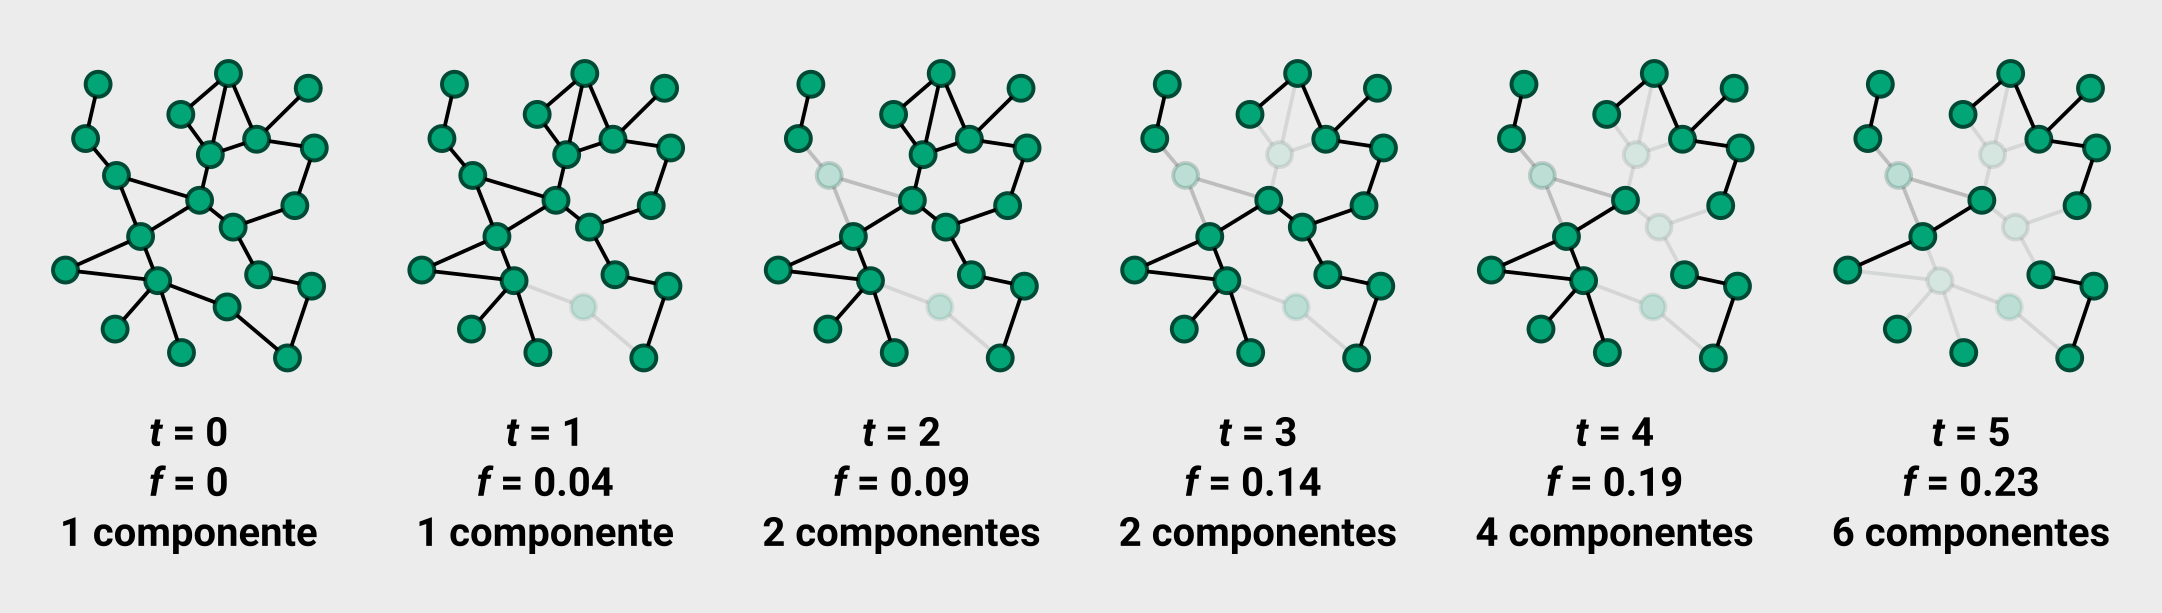

Ahora definimos una función que crea un arreglo booleano de $N\times N$ que representa la látice. Cada sitio (o celda) de la látice puede estar en uno de dos posibles estados: «ocupado» (activo) o «vacío» (desactivo). Un sitio estará ocupado con una probabilidad $p$.

In [8]:
from tqdm import tqdm

In [9]:
def crear_latice(N,p):
    latice = (np.random.rand(N,N) < p )*1
    return latice

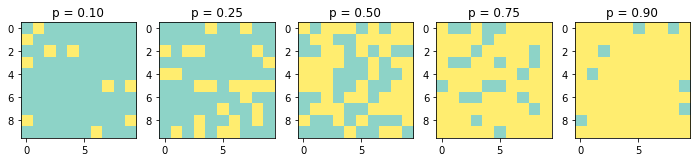

In [10]:
N = 10
p_valores = [0.1,0.25,0.5,0.75,0.9]

fig, axes = plt.subplots(1,len(p_valores),figsize=(12,4))
for i in range(len(p_valores)):
    axes[i].imshow(crear_latice(N,p_valores[i]),cmap='Set3')
    axes[i].set_title('p = %.2f' %(p_valores[i]))
plt.show()


Supongamos que se vierte un material desde el extremo superior de la látice. Si suponemos que el material puede fluir por los sitios ocupados (activos), entonces si este material logra encontrar un camino hasta alcanzar el extremo inferior de la látice, decimos que el material percola. Por ejemplo, supongamos cada sitio ocupado representa un árbol en un bosque y también supongamos que un arbol que se quema también quema a sus 4 vecinos. Si se quemaran todos los árboles en el extremo superior de la látice (primera fila) y el fuego lograra llegar al extremo inferior de la látice (última fila), diríamos que el fuego percoló a travéz del bosque.

Para explorar si un material podría percolar a través de nuestra látice primero identifiquemos todas las componentes que se forman en nuestra látice. Es decir, identifiquemos aquellos grupos de sitios ocupados que sean vecinos entre sí. Para ello construimos un arreglo que registra la componente de cada sitio utilizando dos funciones:

* formar_componentes(): la cual recibe una látice de $N\times N$ y retorna un arreglo de $N\times N$ que indica el número de componente a la que pertence cada sitio ocupado (0 es el valor que reciben los sitios «vacios»). Para construir este arreglo se recorren los sitios de la látice y se les asigna un número de componente con la función asignar_componente()

* asignar_componente(): esta función revisa si un sitio está ocupado y en caso de no tener una componente asignada se le asigna una y se le pide a sus cuatro vecinos que hagan lo mismo recursivamente.

Nota: Dado que python no es un lenguaje funcional la programación recursiva puede provocar algunos errores. Por ejemplo, para látices grandes con alta ocupación (valores grandes de N con valores altos de p) el gran número de veces que la función asignar_componente() es invocada puede arrojar un error que indica que hemos alcanzado la máxima profundidad de recusión permitida RecursionError: maximum recursion depth exceeded in comparison. Existen otros algoritmos más eficientes no recursivos para calcular las componentes conectadas en látices regulares como se describe en los ejercicios finales del notebook. Además, existen paquetes y funciones especializadas para hacer estos cálculos como la función measurements.label() de la paquetería scipy.ndimage.

In [11]:
def formar_componentes(latice):
    # arreglo donde se registran las componentes a las que 
    # pertenece cada sitio de la látice (se inicializa 
    # con 0, valor que representa sitios no ocupados)
    componentes = np.zeros((N,N)).astype(int) 

    num_componente = 1

    # se recorren los indices de la látice
    for i in range(N):
        for j in range(N):
            # cuando se encuentra un sitio "ocupado" sin 
            # componente se le asigna una
            if latice[i][j] and not componentes[i][j]:
                asignar_componente(latice,componentes,i,j,num_componente)
                num_componente += 1
    return componentes

# esta función recibe una látice, un arreglo de componentes, 
# la posición de la entrada del sitio (i,j) y el numero 
# de componente que se le asignará
def asignar_componente(latice,componentes,i,j,num_componente):
    # si estoy fuera de los índices del arreglo, no hago nada
    if (i<0) or (i>=len(latice)) or (j<0) or (j>=len(latice)):
        return
    # si no soy un sitio "ocupado", no hago nada
    if not latice[i][j]:
        return
    # si ya tengo asignada una componente, no hago nada
    if componentes[i][j]:
        return
    # si estoy ocupado y no se me haya asignado componente
    # se me asigna una y le pido a mis cuatro vecinos que 
    # hagan lo mismo recursivamente
    componentes[i][j] = num_componente
    asignar_componente(latice,componentes,i-1,j  ,num_componente) # vecino de arriba
    asignar_componente(latice,componentes,i  ,j+1,num_componente) # vecino de la derecha
    asignar_componente(latice,componentes,i+1,j  ,num_componente) # vecino de abajo
    asignar_componente(latice,componentes,i  ,j-1,num_componente) # vecino de la izquierda

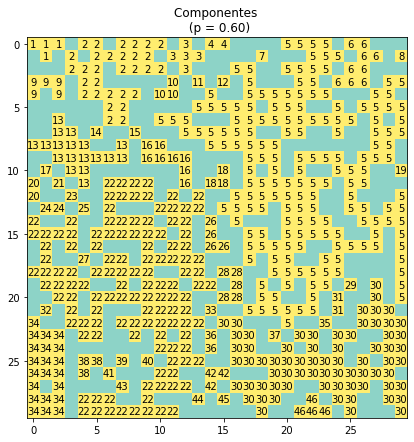

In [12]:
N = 30
p = 0.6

latice = crear_latice(N,p)
componentes = formar_componentes(latice)

plt.figure(figsize=(7,7))
plt.imshow(latice,cmap='Set3')
for (i,j), num_componente in np.ndenumerate(componentes):
    if num_componente != 0:
        plt.text(j,i,num_componente,ha='center',va='center')
plt.title('Componentes \n (p = %.2f)' %(p))
plt.show()

Ahora, para saber si un material podría percolar verticalmente en nuestra látice, se revisa si hay componentes que inicien en el extremo superior y termine en el extremo inferior del arreglo. Para ello definimos una función que retorna las componentes que percolan verticalmente obteniendo los elementos que se compartan entre la primera y la última fila de nuestro arreglo de componentes (se omite el 0, ya que este representa los sitios vacios).

In [13]:
def obtener_componentes_que_percolan_verticalmente(componentes):
    primera_fila = componentes[0]
    ultima_fila = componentes[ len(componentes)-1 ]
    componentes_que_percolan_verticalmente = [comp for comp in list(np.intersect1d(primera_fila,ultima_fila)) if comp > 0]
    return componentes_que_percolan_verticalmente

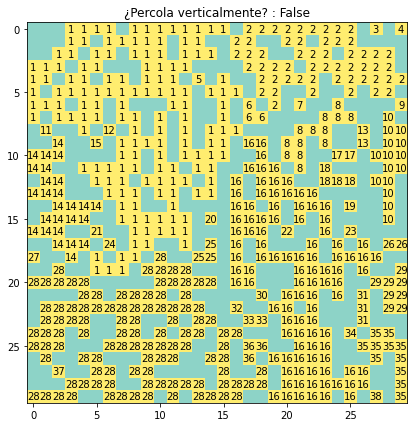

In [14]:
N = 30
p = 0.6

latice = crear_latice(N,p)
componentes = formar_componentes(latice)
componentes_que_percolan_verticalmente = obtener_componentes_que_percolan_verticalmente(componentes)

plt.figure(figsize=(7,7))
plt.imshow(latice,cmap='Set3')
for (i,j), num_componente in np.ndenumerate(componentes):
    if num_componente != 0:
        if num_componente in componentes_que_percolan_verticalmente:
            plt.text(j,i,num_componente,color='#E85160',ha='center',va='center',fontweight='bold')
        else:
            plt.text(j,i,num_componente,ha='center',va='center')
plt.title('¿Percola verticalmente? : %s' %(bool(componentes_que_percolan_verticalmente)))
plt.show()

Otra variable relevante a estudiar en nuestra látice regular (y la variable que monitorearemos cuando estudiemos la percolación en redes) es el tamaño de nuestra máxima componente. Para hacer esto, definimos una nueva función obtener_tamanio_max_comp() que calcula dicho valor a partir de un diccionario con el tamaño de todas las componentes registradas en nuestro arreglo de componentes.

In [15]:
def obtener_tamanio_max_comp(componentes):
    # se obtiene una lista con los números de las componentes
    # y otra que cuenta cuantas veces aparecen en la látice 
    # (i.e., el tamaño de cada una)
    valores, conteo = np.unique(componentes, return_counts=True)
    cuenta = dict(zip(valores,conteo))
    
    # se quitan los sitios no ocupados del 
    # diccionario
    if 0 in cuenta:
        cuenta.pop(0)

    tamanio_max_componente = max(cuenta.values(),default=0)
    max_comps = [ num_comp for num_comp, tamanio in cuenta.items() if tamanio == tamanio_max_componente ]
    return tamanio_max_componente, max_comps

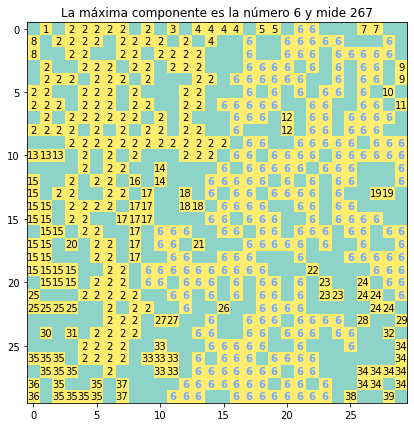

In [16]:
N = 30
p = 0.6

latice = crear_latice(N,p)
componentes = formar_componentes(latice) 
tamanio_max_componente, max_componentes = obtener_tamanio_max_comp(componentes)

plt.figure(figsize=(7,7))
plt.imshow(latice,cmap='Set3')
for (i,j), num_componente in np.ndenumerate(componentes):
    if num_componente != 0:
        if num_componente in max_componentes:
            plt.text(j,i,num_componente,color='#75AAFF',ha='center',va='center',fontweight='bold')
        else:
            plt.text(j,i,num_componente,ha='center',va='center')
plt.title('La máxima componente es la número %i y mide %i' %(max_componentes[0],tamanio_max_componente))
plt.show()

Ahora que ya tenemos todos los elementos necesarios podemos explorar cómo se comportan la probabilidad de percolación y el tamaño de la máxima componente para múltiples valores de la probabilidad de ocupación, $p$. Para ello vamos a integrar todas las funciones que definimos en las subsecciones anteriores en una sola función llamada percolacion() y vamos a realizar un experimento donde exploramos múltiples valores de la probabilidad de ocupación con múltiples repeticiones para cada valor.

In [17]:
def percolacion_latice(N,p):
    latice = crear_latice(N,p)
    componentes = formar_componentes(latice)
    percola = bool(obtener_componentes_que_percolan_verticalmente(componentes))
    tamanio_max_comp,_ = obtener_tamanio_max_comp(componentes)

    return latice, componentes, percola, tamanio_max_comp

Ahora corramos experimentos. Para ello primero definimos una lista con todos los valores de que vamos a explorar. Luego para cada valor de $p$ creamos repeticiones número de látices y para cada una calculamos el tamaño de la máxima componente y si percola y promediamos los resultados de todas las repeticiones. Finalmente graficamos los resultados

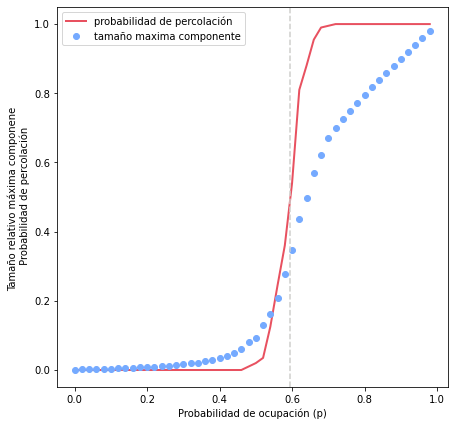

In [18]:
N = 30 # tamaño de la látice

probs_ocupacion = np.arange(0,1,step=0.02) # valores de probabilidad de ocupación a explorar
repeticiones = 200

# listas donde se guardarán los resultados de las simulaciones
promedios_tamanio_max_comp = []
promedios_percola = []

for prob in probs_ocupacion:
    resultados_repeticion_tamanio_max_comp = []
    resultados_repeticion_percola = []
    for repeticion in range(repeticiones):
        _,_, percola, tamanio_comp = percolacion_latice(N,prob)
        resultados_repeticion_tamanio_max_comp.append(tamanio_comp)
        resultados_repeticion_percola.append(percola)

    promedio_tamanio_max_comp = np.mean(resultados_repeticion_tamanio_max_comp)
    promedios_tamanio_max_comp.append(promedio_tamanio_max_comp)
    promedio_percola = np.mean(resultados_repeticion_percola)
    promedios_percola.append(promedio_percola)

# se grafican los resultados
x = probs_ocupacion
y1 = np.array(promedios_percola)
y2 = np.array(promedios_tamanio_max_comp)/(N**2)

plt.figure(figsize=(7,7))
plt.plot(x,y1,label='probabilidad de percolación',color='#E85160',linewidth=2)
plt.plot(x,y2,'o',label='tamaño maxima componente',color="#75AAFF")
plt.axvline(x=0.593,color="#CFCFCC",linestyle='--')
plt.ylabel('Tamaño relativo máxima componene \n Probabilidad de percolación')
plt.xlabel('Probabilidad de ocupación (p)')
plt.legend()
plt.show()

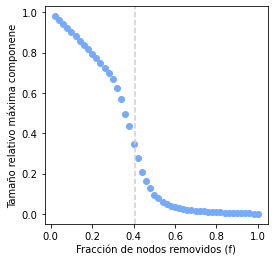

In [19]:
plt.figure(figsize=(4,4))
plt.plot(1-x,y2,'o',label='tamaño maxima componente',color="#75AAFF")
plt.axvline(x=1 - 0.593,color="#CFCFCC",linestyle='--')
plt.ylabel('Tamaño relativo máxima componene')
plt.xlabel('Fracción de nodos removidos (f)')
plt.show()

##  Percolación en redes

Definamos una función que simula la percolación. Esta función recibe una red cualquiera, un valor $f$, la proporción de nodos que se le van a remover y un valor booleano que determina si queremos simular la remoción de nodos por ataques o por fallas (como valor predeterminado le decimos que simule fallas). Primero se calculan la cantidad de nodos a remover, luego, de acuerdo al método de percolación se seleccionan los nodos a remover. En el caso de las fallas se seleccionan aleatoriamente los nodos y en caso de los ataques se ordenan los nodos por su centralidad de grado y se seleccionan primero aquellos con mayores valores. Finalmente se remueven los nodos y se calcula y retorna el tamaño de la componente más grande.

In [2]:
import random

In [3]:
def percolacion_red(G,f,ataque=False):
    num_nodos_a_remover = int(f * G.number_of_nodes())

    if(ataque):
        nodos = [nodo for nodo,grado in sorted(G.degree(),key=lambda item:item[1],reverse=True)]
        nodos_a_remover = nodos[0:num_nodos_a_remover]
    else:
        nodos = list(G.nodes)
        nodos_a_remover = random.sample(nodos,num_nodos_a_remover)

    G.remove_nodes_from(nodos_a_remover)
    tamanio_max_comp = len(max(nx.connected_components(G),key=len))

    return tamanio_max_comp

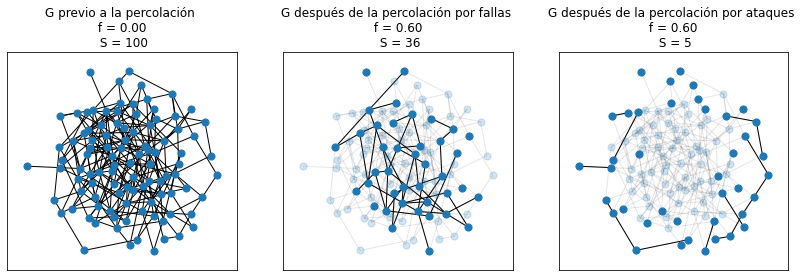

In [4]:
N = 100
p = 0.05

f = 0.6

G = nx.gnp_random_graph(N,p)
G_1 = G.copy()
G_2 = G.copy()
pos = nx.kamada_kawai_layout(G)

fig, axs = plt.subplots(1,3,figsize=(14,4))
# se calcula el tamaño de la máxima componente
# y se grafica previo a la percolación (f=0)
tamanio_max_comp = percolacion_red(G,0)
nx.draw_networkx(G,pos,with_labels=False,ax=axs[0],node_size=50)
axs[0].set_title('G previo a la percolación \n f = %.2f \n S = %i' %(0,tamanio_max_comp))

# se corre la percolación por fallas en esa 
# misma red y se grafica
tamanio_max_comp = percolacion_red(G_1,f)
nx.draw_networkx_edges(G,pos,alpha=0.1,ax=axs[1]) # se grafican enlaces originales como referencia
nx.draw_networkx_nodes(G,pos,node_size=50,ax=axs[1],alpha=0.2) # se grafican nodos originales como referencia
nx.draw_networkx(G_1,pos,with_labels=False,ax=axs[1],node_size=50)
axs[1].set_title('G después de la percolación por fallas \n f = %.2f \n S = %i' %(f,tamanio_max_comp))

# se corre la percolación por ataques en una
# copia de la red original
tamanio_max_comp = percolacion_red(G_2,f,ataque=True)
nx.draw_networkx_edges(G,pos,alpha=0.1,ax=axs[2]) # se grafican enlaces originales como referencia
nx.draw_networkx_nodes(G,pos,node_size=50,ax=axs[2],alpha=0.2) # se grafican nodos originales como referencia
nx.draw_networkx(G_2,pos,with_labels=False,ax=axs[2],node_size=50)
axs[2].set_title('G después de la percolación por ataques \n f = %.2f \n S = %i' %(f,tamanio_max_comp))

plt.show()

Ahora experimentemos para ver cómo cambia el tamaño de la máxima componente con distintos valores de y en distintos tipos de redes: en redes aleatorias con distribución de poisson (Erdös-Rényi) y en redes libres de escala (Barabási-Albert). Para crear nuestras redes utilizaremos las funciones de NetworkX gnm_random_graph(N,L), que crea una red aleatoria Erdös-Rényi con $N$ nodos y $L$ enlaces, y barabasi_albert_graph(N,m), que crea una red libre de escala con $N$ nodos a partir de ir creciendo una red tipo estrella (con $m+1$ nodos $m$ y enlaces) agregando $m$ enlaces con cada nuevo nodo que se introduce. Para que esta comparación sea apropiada debemos correr los experimentos con redes con el mismo número de nodos y enlaces, por lo que a partir $N$ de y $m$ calculamos el valor de $L$ (una red de Barabási-Albert tiene $L=m(N-m)$ enlaces).

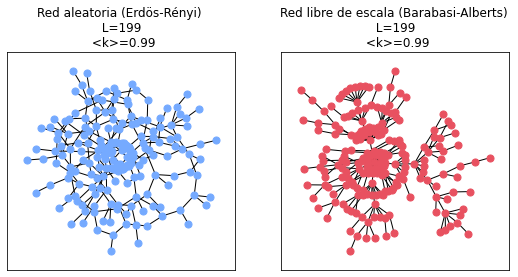

In [5]:
N = 200
m = 1
L = m*(N-m)

# se grafican ejemplos
G = nx.gnm_random_graph(N,L)
H = nx.barabasi_albert_graph(N,m)
posG = nx.kamada_kawai_layout(G)
posH = nx.kamada_kawai_layout(H)

fig, axs = plt.subplots(1,2,figsize=(9,4))
nx.draw_networkx(G,posG,with_labels=False,ax=axs[0],node_size=50,node_color="#75AAFF")
axs[0].set_title('Red aleatoria (Erdös-Rényi) \n L=%i \n <k>=%.2f' %(G.number_of_edges(),G.number_of_edges()/N))
nx.draw_networkx(H,posH,with_labels=False,ax=axs[1],node_size=50,node_color="#E85160")
axs[1].set_title('Red libre de escala (Barabasi-Alberts) \n L=%i \n <k>=%.2f' %(H.number_of_edges(),H.number_of_edges()/N))
plt.show()

Ahora definamos una función para experimentar que corra nuestros experimentos. Esta función nos retornará un DataFrame de pandas y recibirá los siguientes argumentos:

* f_valores: los valores de $f$ que vamos a explorar

* repeticiones: el número de repreticiones que vamos a realizar para cada valor de $f$ a explorar

* ataque: una cadena texto indique si queremos que la percolación se corra por «ataque» o «falla»

* generar_red_callback: una función que genera las redes que queremos percolar. Un callback es una función que es pasada a otra función para que esta última la ejecute cuando la necesite, es un concepto muy útil en progamacion. En este paso nuestro callback serán las funciones de NetworkX gnm_random_graph y barabasi_albert_graph.

* *args: los argumentos que utiliza la función generar_red_callback cuando es ejecutada (e.g., N,L,m dependiendo de nuestro callback)

In [6]:
def experimento_percolacion_redes(f_valores,repeticiones,ataque,generar_red_callback,*args):
    # listas donde se guardaran los resultados 
    # de las simulaciones
    promedios_tamanio_max_comp = []

    for f in f_valores:
        resultados_repeticiones_tamanio_max_comp = []
        for repeticion in range(repeticiones):
            # se crea una red ejecutando el callback
            # y pasándole los argumentos que necesita
            G = generar_red_callback(*args) 
            tamanio_comp = percolacion_red(G,f,ataque)
            resultados_repeticiones_tamanio_max_comp.append(tamanio_comp)

        promedio_tamanio_max_comp = np.mean(resultados_repeticiones_tamanio_max_comp)
        promedios_tamanio_max_comp.append(promedio_tamanio_max_comp)

    return promedios_tamanio_max_comp

Finalmente, definamos nuestros parámetros de la red y de los experimentos,
corrámosolo y grafiquemos nuestros resultados:

In [14]:
# parámetros de las redes
N = 10000 # nodos
m = 2
L = m*(N-m) 

# parámetros experimentos
f_valores = np.arange(0,1,step=0.02)
repeticiones = 30

# corremos los experimentos y los guardamos
resultado_ER_falla = experimento_percolacion_redes(f_valores,repeticiones,False,nx.gnm_random_graph,N,L)
resultado_SF_falla = experimento_percolacion_redes(f_valores,repeticiones,False,nx.barabasi_albert_graph,N,m)
resultado_ER_ataque = experimento_percolacion_redes(f_valores,repeticiones,True,nx.gnm_random_graph,N,L)
resultado_SF_ataque = experimento_percolacion_redes(f_valores,repeticiones,True,nx.barabasi_albert_graph,N,m)

# graficamos los resultados
x = f_valores
y1 = np.array(resultado_ER_falla)/N
y2 = np.array(resultado_SF_falla)/N
y3 = np.array(resultado_ER_ataque)/N
y4 = np.array(resultado_SF_ataque)/N



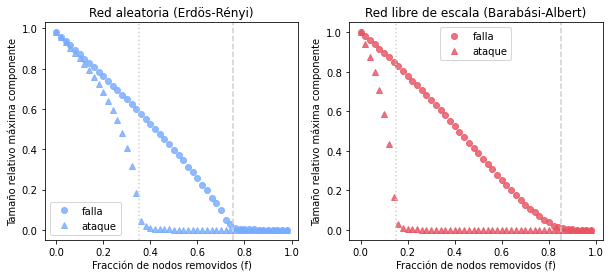

In [12]:
fig, axs = plt.subplots(1,2,figsize=(10,4))

axs[0].plot(x,y1,'o',alpha=0.8,label='falla',color='#75AAFF')
axs[0].plot(x,y3,'^',alpha=0.8,label='ataque',color='#75AAFF')
axs[0].set_title('Red aleatoria (Erdös-Rényi)')
axs[0].set_ylabel('Tamaño relativo máxima componente')
axs[0].set_xlabel('Fracción de nodos removidos (f)')
axs[0].legend()
axs[0].axvline(x=0.75,color="#CFCFCC",linestyle='--')
axs[0].axvline(x=0.35,color="#CFCFCC",linestyle=':')

axs[1].plot(x,y2,'o',alpha=0.8,label='falla',color='#E85160')
axs[1].plot(x,y4,'^',alpha=0.8,label='ataque',color='#E85160')
axs[1].set_title('Red libre de escala (Barabási-Albert)')
axs[1].set_ylabel('Tamaño relativo máxima componente')
axs[1].set_xlabel('Fracción de nodos removidos (f)')
axs[1].legend()
axs[1].axvline(x=0.85,color="#CFCFCC",linestyle='--')
axs[1].axvline(x=0.15,color="#CFCFCC",linestyle=':')

plt.show()

## Red de jazzistas para observar percolación en falla y acción


In [ ]:
ruta = 'jazz.net'

datos = pd.read_csv(ruta,
            #nrows = 10,
            skiprows = 3,
            header = None,
            sep = ' ',
            usec1ols = [0,1]
            )
datos

# Aleatorización en redes

In [4]:
datos = pd.read_csv('cit-DBLP/cit-DBLP.edges',
            skiprows=2,
            sep = ' ',
            header = None,
            usecols = [0,1]
           )
datos

0      1
0          1      2
1          1      3
2          1      4
3          1      5
4          1      6
...      ...    ...
49738  12582  12583
49739  12584  12585
49740  12586  12587
49741  12588  12589
49742  12590  12591

[49743 rows x 2 columns]

In [5]:
g = nx.from_pandas_edgelist(datos,0,1)

In [6]:
nx.average_clustering(g)

0.11685635806662431

In [7]:
grado = np.array([g.degree(nodo) for nodo in g])

In [8]:
M =  grado.max()
y ,x = np.histogram(grado, bins = range(M+2))
x = x[:-1]

In [9]:
def DistGrado(g):
    grado = np.array([g.degree(nodo) for nodo in g])

    M =  grado.max()
    y ,x = np.histogram(grado, bins = range(M+2))
    x = x[:-1]

    plt.plot(x,y,'.')
    plt.xscale('log')
    plt.yscale('log')

Generamos una red aleatoria a partir de la red que hemos desvargado. Para ello vamos a aleatorizar, y con ello veremos que propiedades de la red conservamos y que otras modificamos. VAmos a conservar el número de nodos, número de enlaces y distribucíon de grado. 

In [10]:
gc = g.copy()

In [11]:
E = list(gc.edges)
E[1]

(1, 3)

In [10]:
i1, i2 = np.random.choice(len(E), 2, replace = False)
n1, n2 = E[i1]
n3, n4 = E[i2]

In [11]:
gc.remove_edge(n1,n2)
gc.remove_edge(n3,n4)

gc.add_edge(n1,n4)
gc.add_edge(n3,n2)

In [12]:
from tqdm import tqdm

In [13]:
C = []

for i in tqdm(range(5000)):
    E = list(gc.edges)
    
    i1, i2 = np.random.choice(len(E), 2, replace = False)
    n1, n2 = E[i1]
    n3, n4 = E[i2]
    if (n1,n4) in E:continue
    if (n3,n2) in E:continue
    gc.remove_edge(n1,n2)
    gc.remove_edge(n3,n4)

    gc.add_edge(n1,n4)
    gc.add_edge(n3,n2)
    if i % 100 == 0:
        C.append(nx.average_clustering(gc))

100%|███████████████████████████████████████| 5000/5000 [03:18<00:00, 25.22it/s]


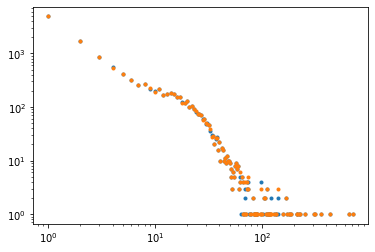

In [14]:
DistGrado(g)
DistGrado(gc)

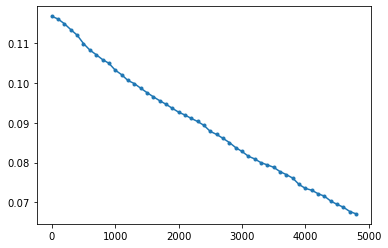

In [15]:
plt.plot([100*i for i in range(len(C))],C,'.-')

In [75]:
len(gc.edges)

49487

In [18]:

len(g.edges)

49635